# Mining and Analyzing Facebook Data

## Importing the libraries

In [ ]:
!pip install facebook-sdk
#!pip install facebook-sdk==3.1.0

In [ ]:
import facebook
import requests
import pandas as pd
import numpy as np

In [ ]:
!pip install plotly --upgrade

     |████████████████████████████████| 27.7 MB 1.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
import plotly.express as px

## Getting the temporary token

In [ ]:
app_id = '422484262973977'
app_secret = 'b0c73ecdb33eb67e958b6d924a800cdd'
# 1 hour
user_short_token = 'EAAGAP0hq8hkBALcdFwYqRKtficnJVnEG2RaMXHKESUZCG5p4ZBx1gYzXIqtvpBVmiuGjvqq6W7LoeAMLK9d0694etrnXgUZCdTq9ai8dcZC1Ybl6KZB8kkspKi5WUMcyFlOlUX86ZC7P9abHSxZC1QkUIn2XnNhYxyLrq2DgZAZCRn0spbLCyxQuO34rJ6HaE7ZAOZA4eGOcsxgaRUTHfIn5eXdon90YkEiWPIZD'

In [ ]:
url = 'https://graph.facebook.com/oauth/access_token'

In [ ]:
parameters = {'grant_type': 'fb_exchange_token',
              'client_id': app_id,
              'client_secret': app_secret,
              'fb_exchange_token': user_short_token}

In [ ]:
response = requests.get(url, params=parameters)

In [ ]:
response

<Response [200]>

In [ ]:
response_json = response.json()
response_json

{'access_token': 'EAAGAP0hq8hkBAAQskyl5YJrlRm334blLuWQeyoOxpzFuwhmqTrANvB4WZC4Fn3DmCHgUPAq1rEzF7XY2QuZAf3RiXhTuVkHKOtn31EzwL4VhA4zwWTP2kXOBYVP2ZBrrse0askNatkK5tiLwjlRKuPCeoG5JBMZB1hNdTZB3xZCZATXE7KTMsgOtLj084jq6UEZD',
 'expires_in': 5181423,
 'token_type': 'bearer'}

In [ ]:
# 2 months
user_long_token = response_json['access_token']
user_long_token

'EAAGAP0hq8hkBAAQskyl5YJrlRm334blLuWQeyoOxpzFuwhmqTrANvB4WZC4Fn3DmCHgUPAq1rEzF7XY2QuZAf3RiXhTuVkHKOtn31EzwL4VhA4zwWTP2kXOBYVP2ZBrrse0askNatkK5tiLwjlRKuPCeoG5JBMZB1hNdTZB3xZCZATXE7KTMsgOtLj084jq6UEZD'

## Getting the permanent token

In [ ]:
graph = facebook.GraphAPI(access_token=user_long_token, version=3.1)

In [ ]:
page_data = graph.get_object('/me/accounts')
page_data

{'data': [{'access_token': 'EAAGAP0hq8hkBALA5ZCT0jtEKTRxNYAUwWpm38ZBDXB5ec3wbERXlZCmKpI4ZCHyEOpwFzbUJXG6q16LhoWrSgwQ9cgpLzfJZARlStU2FY9LSwg6Y5adFYZBO5PZCqNRQzZCJCCuPhZAZB0ENxYHDSZCIwufilL9dP14ZABRB1qLt5JTnTwnZBZCknmeie1powkCB4dOlMZD',
   'category': 'Tutor/Teacher',
   'category_list': [{'id': '145296352197250', 'name': 'Tutor/Teacher'}],
   'id': '228782997490446',
   'name': 'IA Expert Academy - Inteligência Artificial',
   'tasks': ['ANALYZE',
    'ADVERTISE',
    'MESSAGING',
    'MODERATE',
    'CREATE_CONTENT',
    'MANAGE']},
  {'access_token': 'EAAGAP0hq8hkBALNPZBcHAWt15XsSx1StIGgHEzVmMzbvrnhmtE8GGQH729dPvUNDfZAhMoHBgbGo3lI8vexjso3sE7URkmrXDjMKjTE6o7ETYlNphBuDcztHqwKcjBXIOzDBh0YBlpjrNszC6oKNbT1y8pXYb2PnDn9z62vR90K1ZA7TGmlTNr0d7YKOIUOaK9j8ZAt53AZDZD',
   'category': 'Local business',
   'category_list': [{'id': '2500', 'name': 'Local Business'}],
   'id': '945388505603058',
   'name': 'IA Expert',
   'tasks': ['ANALYZE',
    'ADVERTISE',
    'MESSAGING',
    'MODERATE',
    'CRE

In [ ]:
# Lifetime token
permanent_page_token = page_data['data'][0]['access_token']
permanent_page_token

'EAAGAP0hq8hkBALA5ZCT0jtEKTRxNYAUwWpm38ZBDXB5ec3wbERXlZCmKpI4ZCHyEOpwFzbUJXG6q16LhoWrSgwQ9cgpLzfJZARlStU2FY9LSwg6Y5adFYZBO5PZCqNRQzZCJCCuPhZAZB0ENxYHDSZCIwufilL9dP14ZABRB1qLt5JTnTwnZBZCknmeie1powkCB4dOlMZD'

In [ ]:
page_id = page_data['data'][0]['id']
page_id

'228782997490446'

In [ ]:
permanent_page_token = 'EAAGAP0hq8hkBALA5ZCT0jtEKTRxNYAUwWpm38ZBDXB5ec3wbERXlZCmKpI4ZCHyEOpwFzbUJXG6q16LhoWrSgwQ9cgpLzfJZARlStU2FY9LSwg6Y5adFYZBO5PZCqNRQzZCJCCuPhZAZB0ENxYHDSZCIwufilL9dP14ZABRB1qLt5JTnTwnZBZCknmeie1powkCB4dOlMZD'
page_id = '228782997490446'

## Basic profile data

- Documentation: https://developers.facebook.com/docs/graph-api/reference/v13.0/insights

In [ ]:
graph = facebook.GraphAPI(access_token=permanent_page_token, version=3.1)

In [ ]:
graph.get_object(id = page_id, fields='category')

{'category': 'Tutor/Teacher', 'id': '228782997490446'}

In [ ]:
graph.get_object(id = page_id, fields='name')

{'id': '228782997490446',
 'name': 'IA Expert Academy - Inteligência Artificial'}

In [ ]:
graph.get_object(id = page_id)

{'id': '228782997490446',
 'name': 'IA Expert Academy - Inteligência Artificial'}

In [ ]:
graph.get_object(id = page_id, fields='about,website')

{'about': 'O objetivo é trazer conteúdo sobre Inteligência Artificial e como esses conceitos podem ser aplicados na prática por profissionais de TI',
 'id': '228782997490446',
 'website': 'http://www.iaexpert.com.br'}

In [ ]:
graph.get_object(id = page_id, fields='fan_count')

{'fan_count': 5251, 'id': '228782997490446'}

In [ ]:
graph.get_object(id = page_id, fields='birthday')

{'birthday': '05/19/2016', 'id': '228782997490446'}

In [ ]:
graph.get_object(id = page_id, fields='engagement')

{'engagement': {'count': 5251, 'social_sentence': '5.2K people like this.'},
 'id': '228782997490446'}

In [ ]:
graph.get_object(id = page_id, fields='followers_count')

{'followers_count': 5251, 'id': '228782997490446'}

## Data about fans

### Fans by date

In [ ]:
graph.get_connections(id = page_id, connection_name = 'insights', metric = 'page_fans')

{'data': [{'description': 'Lifetime: The total number of people who have liked your Page. (Unique Users)',
   'id': '228782997490446/insights/page_fans/day',
   'name': 'page_fans',
   'period': 'day',
   'title': 'Lifetime Total Likes',
   'values': [{'end_time': '2022-03-04T08:00:00+0000', 'value': 5236},
    {'end_time': '2022-03-05T08:00:00+0000', 'value': 5235}]}],
 'paging': {'next': 'https://graph.facebook.com/v13.0/228782997490446/insights?access_token=EAAGAP0hq8hkBALA5ZCT0jtEKTRxNYAUwWpm38ZBDXB5ec3wbERXlZCmKpI4ZCHyEOpwFzbUJXG6q16LhoWrSgwQ9cgpLzfJZARlStU2FY9LSwg6Y5adFYZBO5PZCqNRQzZCJCCuPhZAZB0ENxYHDSZCIwufilL9dP14ZABRB1qLt5JTnTwnZBZCknmeie1powkCB4dOlMZD&metric=page_fans&since=1646467200&until=1646640000',
  'previous': 'https://graph.facebook.com/v13.0/228782997490446/insights?access_token=EAAGAP0hq8hkBALA5ZCT0jtEKTRxNYAUwWpm38ZBDXB5ec3wbERXlZCmKpI4ZCHyEOpwFzbUJXG6q16LhoWrSgwQ9cgpLzfJZARlStU2FY9LSwg6Y5adFYZBO5PZCqNRQzZCJCCuPhZAZB0ENxYHDSZCIwufilL9dP14ZABRB1qLt5JTnTwnZBZCknmeie1

In [ ]:
fans = graph.get_connections(id = page_id, connection_name = 'insights', metric = 'page_fans',
                      since = '2021-12-03', until = '2022-03-03')

In [ ]:
type(fans), type(fans['data']), type(fans['data'][0]['values'])

(dict, list, list)

In [ ]:
fans

{'data': [{'description': 'Lifetime: The total number of people who have liked your Page. (Unique Users)',
   'id': '228782997490446/insights/page_fans/day',
   'name': 'page_fans',
   'period': 'day',
   'title': 'Lifetime Total Likes',
   'values': [{'end_time': '2021-12-04T08:00:00+0000', 'value': 5226},
    {'end_time': '2021-12-05T08:00:00+0000', 'value': 5226},
    {'end_time': '2021-12-06T08:00:00+0000', 'value': 5227},
    {'end_time': '2021-12-07T08:00:00+0000', 'value': 5226},
    {'end_time': '2021-12-08T08:00:00+0000', 'value': 5226},
    {'end_time': '2021-12-09T08:00:00+0000', 'value': 5229},
    {'end_time': '2021-12-10T08:00:00+0000', 'value': 5229},
    {'end_time': '2021-12-11T08:00:00+0000', 'value': 5228},
    {'end_time': '2021-12-12T08:00:00+0000', 'value': 5228},
    {'end_time': '2021-12-13T08:00:00+0000', 'value': 5229},
    {'end_time': '2021-12-14T08:00:00+0000', 'value': 5230},
    {'end_time': '2021-12-15T08:00:00+0000', 'value': 5228},
    {'end_time': '20

In [ ]:
dataframe_facebook = pd.DataFrame(fans['data'][0]['values'])
dataframe_facebook.rename(columns = {'value': 'number of fans', 'end_time': 'date'}, inplace = True)
dataframe_facebook['date'] = pd.to_datetime(dataframe_facebook['date'])
dataframe_facebook['date'] = dataframe_facebook['date'].dt.strftime('%Y-%m-%d')
dataframe_facebook

,number of fans,date
0,5226,2021-12-04
1,5226,2021-12-05
2,5227,2021-12-06
3,5226,2021-12-07
4,5226,2021-12-08
...,...,...
83,5231,2022-02-26
84,5232,2022-02-27
85,5232,2022-02-28
86,5232,2022-03-01


In [ ]:
dataframe_facebook.describe()

,number of fans
count,88.000000
mean,5226.977273
std,5.139384
min,5216.000000
25%,5223.750000
50%,5227.500000
75%,5231.000000
max,5236.000000


In [ ]:
plot = px.line(dataframe_facebook, x = 'date', y = 'number of fans', title = 'Number of fans by date')
plot.show()

### Fans by language

In [ ]:
fans_language = graph.get_connections(id = page_id, connection_name = 'insights', metric = 'page_fans_locale',
                                      since = '2022-03-03', until = '2022-03-03')
fans_language

{'data': [{'description': 'Lifetime: Aggregated language data about the people who like your Page based on the default language setting selected when accessing Facebook. (Unique Users)',
   'id': '228782997490446/insights/page_fans_locale/day',
   'name': 'page_fans_locale',
   'period': 'day',
   'title': 'Lifetime Likes by Language',
   'values': [{'end_time': '2022-03-02T08:00:00+0000',
     'value': {'ar_AR': 1,
      'de_DE': 2,
      'en_GB': 29,
      'en_PI': 1,
      'en_US': 268,
      'es_ES': 17,
      'es_LA': 43,
      'fr_FR': 16,
      'hi_IN': 1,
      'nb_NO': 1,
      'pt_BR': 4625,
      'pt_PT': 226,
      'vi_VN': 3}}]}],
 'paging': {'next': 'https://graph.facebook.com/v13.0/228782997490446/insights?access_token=EAAGAP0hq8hkBALA5ZCT0jtEKTRxNYAUwWpm38ZBDXB5ec3wbERXlZCmKpI4ZCHyEOpwFzbUJXG6q16LhoWrSgwQ9cgpLzfJZARlStU2FY9LSwg6Y5adFYZBO5PZCqNRQzZCJCCuPhZAZB0ENxYHDSZCIwufilL9dP14ZABRB1qLt5JTnTwnZBZCknmeie1powkCB4dOlMZD&since=1646208000&until=1646294400&metric=page_fans_

In [ ]:
fans_language['data'][0]['values'][0]['value']

{'ar_AR': 1,
 'de_DE': 2,
 'en_GB': 29,
 'en_PI': 1,
 'en_US': 268,
 'es_ES': 17,
 'es_LA': 43,
 'fr_FR': 16,
 'hi_IN': 1,
 'nb_NO': 1,
 'pt_BR': 4625,
 'pt_PT': 226,
 'vi_VN': 3}

In [ ]:
fans_language_df = pd.DataFrame.from_dict(fans_language['data'][0]['values'][0]['value'], orient = 'index')
fans_language_df.reset_index(inplace = True)
fans_language_df.rename(columns={'index': 'language', 0: 'quantity'}, inplace = True)
fans_language_df

,language,quantity
0,es_LA,43
1,hi_IN,1
2,vi_VN,3
3,pt_BR,4625
4,en_PI,1
5,fr_FR,16
6,de_DE,2
7,nb_NO,1
8,ar_AR,1
9,en_GB,29


In [ ]:
plot = px.bar(fans_language_df, x = 'language', y = 'quantity', title = 'Fans by language')
plot.show()

### Fans by city

In [ ]:
fans_city = graph.get_connections(id=page_id, connection_name = 'insights', metric = 'page_fans_city',
                                  since = '2022-03-03', until = '2022-03-03')
fans_city

{'data': [{'description': 'Lifetime: Aggregated Facebook location data, sorted by city (top 50), about the people who like your Page. (Unique Users)',
   'id': '228782997490446/insights/page_fans_city/day',
   'name': 'page_fans_city',
   'period': 'day',
   'title': 'Lifetime Likes by City',
   'values': [{'end_time': '2022-03-02T08:00:00+0000',
     'value': {'Bauru, SP, Brazil': 18,
      'Belo Horizonte, MG, Brazil': 90,
      'Belém, PA, Brazil': 52,
      'Brasília, DF, Brazil': 91,
      'Campina Grande, PB, Brazil': 22,
      'Campinas, SP, Brazil': 71,
      'Campo Grande, MS, Brazil': 34,
      'Canoinhas, SC, Brazil': 18,
      'Cuiabá, MT, Brazil': 18,
      'Curitiba, PR, Brazil': 98,
      'Florianópolis, SC, Brazil': 55,
      'Fortaleza, CE, Brazil': 106,
      'Foz do Iguaçu, PR, Brazil': 18,
      'Francisco Beltrão, PR, Brazil': 35,
      'Goiânia, GO, Brazil': 67,
      'Guarulhos, SP, Brazil': 33,
      'Joinville, SC, Brazil': 29,
      'João Pessoa, PB, Brazil': 

In [ ]:
fans_city['data'][0]['values'][0]['value']

{'Bauru, SP, Brazil': 18,
 'Belo Horizonte, MG, Brazil': 90,
 'Belém, PA, Brazil': 52,
 'Brasília, DF, Brazil': 91,
 'Campina Grande, PB, Brazil': 22,
 'Campinas, SP, Brazil': 71,
 'Campo Grande, MS, Brazil': 34,
 'Canoinhas, SC, Brazil': 18,
 'Cuiabá, MT, Brazil': 18,
 'Curitiba, PR, Brazil': 98,
 'Florianópolis, SC, Brazil': 55,
 'Fortaleza, CE, Brazil': 106,
 'Foz do Iguaçu, PR, Brazil': 18,
 'Francisco Beltrão, PR, Brazil': 35,
 'Goiânia, GO, Brazil': 67,
 'Guarulhos, SP, Brazil': 33,
 'Joinville, SC, Brazil': 29,
 'João Pessoa, PB, Brazil': 28,
 'Juiz de Fora, MG, Brazil': 20,
 'Londrina, PR, Brazil': 30,
 'Luanda, Angola': 27,
 'Maceió, AL, Brazil': 30,
 'Manaus, AM, Brazil': 100,
 'Maringá, PR, Brazil': 29,
 'Natal, RN, Brazil': 32,
 'Niterói, RJ, Brazil': 21,
 'Osasco, SP, Brazil': 33,
 'Porto Alegre': 78,
 'Pôrto União, SC, Brazil': 40,
 'Recife, PE, Brazil': 69,
 'Ribeirão Prêto, SP, Brazil': 20,
 'Rio de Janeiro, RJ, Brazil': 229,
 'Salvador, BA, Brazil': 58,
 'Santo André, 

In [ ]:
fans_city_df = pd.DataFrame.from_dict(fans_city['data'][0]['values'][0]['value'], orient = 'index')
fans_city_df.reset_index(inplace=True)
fans_city_df.rename(columns={'index': 'city', 0: 'quantity'}, inplace=True)
fans_city_df

,city,quantity
0,"Vitória, ES, Brazil",17
1,"Cuiabá, MT, Brazil",18
2,"Canoinhas, SC, Brazil",18
3,"Bauru, SP, Brazil",18
4,"Santos, SP, Brazil",18
5,"Foz do Iguaçu, PR, Brazil",18
6,"São Bernardo do Campo, SP, Brazil",19
7,"São Carlos, SP, Brazil",19
8,"Juiz de Fora, MG, Brazil",20
9,"Ribeirão Prêto, SP, Brazil",20


In [ ]:
plot = px.bar(fans_city_df, x = 'city', y = 'quantity', title = 'Fans by city')
plot.show()

In [ ]:
plot = px.treemap(fans_city_df, path = ['city', 'quantity'])
plot.show()

### Fans by country

In [ ]:
fans_country = graph.get_connections(id=page_id, connection_name='insights', metric='page_fans_country',
                                     since = '2022-03-03', until = '2022-03-03')
fans_country

{'data': [{'description': 'Lifetime: Aggregated Facebook location data, sorted by country (top 50), about the people who like your Page. (Unique Users)',
   'id': '228782997490446/insights/page_fans_country/day',
   'name': 'page_fans_country',
   'period': 'day',
   'title': 'Lifetime Likes by Country',
   'values': [{'end_time': '2022-03-02T08:00:00+0000',
     'value': {'AO': 32,
      'AR': 1,
      'AU': 2,
      'BD': 1,
      'BE': 3,
      'BO': 3,
      'BR': 4968,
      'CA': 8,
      'CH': 1,
      'CL': 2,
      'CO': 9,
      'CV': 7,
      'DE': 10,
      'EC': 5,
      'EE': 1,
      'EG': 1,
      'ES': 1,
      'FR': 9,
      'GB': 5,
      'GT': 1,
      'IE': 5,
      'IN': 6,
      'IT': 2,
      'JP': 2,
      'MC': 1,
      'MX': 8,
      'MZ': 3,
      'NE': 1,
      'NG': 1,
      'NL': 3,
      'NO': 1,
      'NZ': 1,
      'PE': 21,
      'PK': 1,
      'PL': 1,
      'PT': 75,
      'PY': 2,
      'RO': 2,
      'SY': 1,
      'TH': 1,
      'TN': 1,
      'T

In [ ]:
fans_country['data'][0]['values'][0]['value']

{'AO': 32,
 'AR': 1,
 'AU': 2,
 'BD': 1,
 'BE': 3,
 'BO': 3,
 'BR': 4968,
 'CA': 8,
 'CH': 1,
 'CL': 2,
 'CO': 9,
 'CV': 7,
 'DE': 10,
 'EC': 5,
 'EE': 1,
 'EG': 1,
 'ES': 1,
 'FR': 9,
 'GB': 5,
 'GT': 1,
 'IE': 5,
 'IN': 6,
 'IT': 2,
 'JP': 2,
 'MC': 1,
 'MX': 8,
 'MZ': 3,
 'NE': 1,
 'NG': 1,
 'NL': 3,
 'NO': 1,
 'NZ': 1,
 'PE': 21,
 'PK': 1,
 'PL': 1,
 'PT': 75,
 'PY': 2,
 'RO': 2,
 'SY': 1,
 'TH': 1,
 'TN': 1,
 'TW': 1,
 'UG': 1,
 'US': 10,
 'VN': 5}

In [ ]:
fans_country_df = pd.DataFrame.from_dict(fans_country['data'][0]['values'][0]['value'], orient='index')
fans_country_df.reset_index(inplace=True)
fans_country_df.rename(columns={"index": "country", 0: "quantity"}, inplace=True)
fans_country_df

,country,quantity
0,NO,1
1,DE,10
2,BD,1
3,TW,1
4,BE,3
5,PT,75
6,JP,2
7,PY,2
8,NZ,1
9,FR,9


In [ ]:
plot = px.bar(fans_country_df, x="country", y="quantity", title = 'Fans by country')
plot.show()

In [ ]:
plot = px.treemap(fans_country_df, path=['country', 'quantity'])
plot.show()

### Fans by age and gender

In [ ]:
fans_age_gender = graph.get_connections(id=page_id, connection_name='insights', metric='page_fans_gender_age',
                                        since = '2022-03-03', until = '2022-03-03')
fans_age_gender

{'data': [{'description': 'Lifetime: Aggregated demographic data about the people who like your Page based on the age and gender information they provide in their user profiles. (Unique Users)',
   'id': '228782997490446/insights/page_fans_gender_age/day',
   'name': 'page_fans_gender_age',
   'period': 'day',
   'title': 'Lifetime Likes by Gender and Age',
   'values': [{'end_time': '2022-03-02T08:00:00+0000',
     'value': {'F.13-17': 1,
      'F.18-24': 234,
      'F.25-34': 325,
      'F.35-44': 224,
      'F.45-54': 96,
      'F.55-64': 31,
      'F.65+': 7,
      'M.13-17': 2,
      'M.18-24': 764,
      'M.25-34': 1904,
      'M.35-44': 1134,
      'M.45-54': 378,
      'M.55-64': 100,
      'M.65+': 26,
      'U.18-24': 1,
      'U.25-34': 3,
      'U.35-44': 1,
      'U.45-54': 1,
      'U.55-64': 1}}]}],
 'paging': {'next': 'https://graph.facebook.com/v13.0/228782997490446/insights?access_token=EAAGAP0hq8hkBALA5ZCT0jtEKTRxNYAUwWpm38ZBDXB5ec3wbERXlZCmKpI4ZCHyEOpwFzbUJXG6q16Lho

In [ ]:
fans_age_gender['data'][0]['values'][0]['value']

{'F.13-17': 1,
 'F.18-24': 234,
 'F.25-34': 325,
 'F.35-44': 224,
 'F.45-54': 96,
 'F.55-64': 31,
 'F.65+': 7,
 'M.13-17': 2,
 'M.18-24': 764,
 'M.25-34': 1904,
 'M.35-44': 1134,
 'M.45-54': 378,
 'M.55-64': 100,
 'M.65+': 26,
 'U.18-24': 1,
 'U.25-34': 3,
 'U.35-44': 1,
 'U.45-54': 1,
 'U.55-64': 1}

In [ ]:
fans_age_gender_df = pd.DataFrame.from_dict(fans_age_gender['data'][0]['values'][0]['value'], orient='index')
fans_age_gender_df.reset_index(inplace=True)
fans_age_gender_df.rename(columns={"index": "age gender", 0: "quantity"}, inplace=True)
fans_age_gender_df

,age gender,quantity
0,U.55-64,1
1,M.55-64,100
2,U.35-44,1
3,F.45-54,96
4,M.18-24,764
5,M.35-44,1134
6,F.25-34,325
7,U.18-24,1
8,M.25-34,1904
9,F.13-17,1


In [ ]:
plot = px.bar(fans_age_gender_df, x="age gender", y="quantity", title = 'Fans by age and gender')
plot.show()

### Likes and dislikes

In [ ]:
likes = graph.get_connections(id=page_id, connection_name='insights', metric = 'page_fan_adds',
                              since = '2021-12-03', until = '2022-03-03')
likes

{'data': [{'description': 'Daily: The number of new people who have liked your Page (Total Count)',
   'id': '228782997490446/insights/page_fan_adds/day',
   'name': 'page_fan_adds',
   'period': 'day',
   'title': 'Daily New Likes',
   'values': [{'end_time': '2021-12-04T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-05T08:00:00+0000', 'value': 1},
    {'end_time': '2021-12-06T08:00:00+0000', 'value': 2},
    {'end_time': '2021-12-07T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-08T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-09T08:00:00+0000', 'value': 3},
    {'end_time': '2021-12-10T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-11T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-12T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-13T08:00:00+0000', 'value': 1},
    {'end_time': '2021-12-14T08:00:00+0000', 'value': 1},
    {'end_time': '2021-12-15T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-16T08:00:00+0000', 'value': 0},
  

In [ ]:
number_of_likes = []
for i in likes['data'][0]['values']:
  #print(i['value'])
  number_of_likes.append(i['value'])
number_of_likes = np.array(number_of_likes)

In [ ]:
number_of_likes

array([0, 1, 2, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 3, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0,
       3, 0, 0, 0, 0, 0, 0, 2, 2, 1, 4, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 2, 2, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0,
       1])

In [ ]:
dislikes = graph.get_connections(id=page_id, connection_name='insights', metric='page_fan_removes',
                                 since = '2021-12-03', until = '2022-03-03')
dislikes

{'data': [{'description': 'Daily: The number of Unlikes of your Page (Total Count)',
   'id': '228782997490446/insights/page_fan_removes/day',
   'name': 'page_fan_removes',
   'period': 'day',
   'title': 'Daily Unlikes',
   'values': [{'end_time': '2021-12-04T08:00:00+0000', 'value': 2},
    {'end_time': '2021-12-05T08:00:00+0000', 'value': 1},
    {'end_time': '2021-12-06T08:00:00+0000', 'value': 1},
    {'end_time': '2021-12-07T08:00:00+0000', 'value': 1},
    {'end_time': '2021-12-08T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-09T08:00:00+0000', 'value': 2},
    {'end_time': '2021-12-10T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-11T08:00:00+0000', 'value': 1},
    {'end_time': '2021-12-12T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-13T08:00:00+0000', 'value': 1},
    {'end_time': '2021-12-14T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-15T08:00:00+0000', 'value': 2},
    {'end_time': '2021-12-16T08:00:00+0000', 'value': 2},
    {'end_tim

In [ ]:
number_of_dislikes = []
for i in dislikes['data'][0]['values']:
  number_of_dislikes.append(i['value'])
number_of_dislikes = np.array(number_of_dislikes)

In [ ]:
number_of_dislikes

array([2, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 3, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0,
       0])

In [ ]:
dataframe_facebook.head()

,number of fans,date
0,5226,2021-12-04
1,5226,2021-12-05
2,5227,2021-12-06
3,5226,2021-12-07
4,5226,2021-12-08


In [ ]:
len(dataframe_facebook), len(number_of_likes), len(number_of_dislikes) # (88, 90, 90)

(88, 89, 89)

In [ ]:
dataframe_facebook['number of likes'] = number_of_likes[:-1]
dataframe_facebook['number of dislikes'] = number_of_dislikes[:-1]
dataframe_facebook

,number of fans,date,number of likes,number of dislikes
0,5226,2021-12-04,0,2
1,5226,2021-12-05,1,1
2,5227,2021-12-06,2,1
3,5226,2021-12-07,0,1
4,5226,2021-12-08,0,0
...,...,...,...,...
83,5231,2022-02-26,0,2
84,5232,2022-02-27,1,1
85,5232,2022-02-28,2,1
86,5232,2022-03-01,0,0


In [ ]:
dataframe_facebook.describe()

,number of fans,number of likes,number of dislikes
count,88.000000,88.000000,88.000000
mean,5226.977273,0.750000,0.659091
std,5.139384,0.861034,0.756373
min,5216.000000,0.000000,0.000000
25%,5223.750000,0.000000,0.000000
50%,5227.500000,1.000000,0.500000
75%,5231.000000,1.000000,1.000000
max,5236.000000,4.000000,3.000000


In [ ]:
dataframe_facebook[dataframe_facebook['number of likes'] == 4]

,number of fans,date,number of likes,number of dislikes
54,5229,2022-01-27,4,0


In [ ]:
dataframe_facebook[dataframe_facebook['number of dislikes'] == 3]

,number of fans,date,number of likes,number of dislikes
20,5217,2021-12-24,1,3


In [ ]:
plot = px.line(title = 'Likes x Dislikes')
plot.add_scatter(x = dataframe_facebook['date'], y = dataframe_facebook['number of likes'], name = 'Likes')
plot.add_scatter(x = dataframe_facebook['date'], y = dataframe_facebook['number of dislikes'], name = 'Dislikes')
plot.show()

In [ ]:
dataframe_facebook['number of likes'].sum(), dataframe_facebook['number of dislikes'].sum()

(66, 58)

In [ ]:
66 + 58, (58 / 126) * 100

(124, 46.03174603174603)

In [ ]:
dislikes_type = graph.get_connections(id=page_id, connection_name='insights', metric = 'page_fans_by_unlike_source_unique',
                                      since = '2021-12-03', until = '2022-03-03')
dislikes_type

{'data': [{'description': 'Daily: The number of people who unliked your Page, broken down by the most common places where people can unlike your Page. (Unique Users)',
   'id': '228782997490446/insights/page_fans_by_unlike_source_unique/day',
   'name': 'page_fans_by_unlike_source_unique',
   'period': 'day',
   'title': 'Daily Unlike Sources',
   'values': [{'end_time': '2021-12-04T08:00:00+0000',
     'value': {'Deactivated or Memorialized Account Removals': 1,
      'Suspicious Account Removals': 1}},
    {'end_time': '2021-12-05T08:00:00+0000',
     'value': {'Deactivated or Memorialized Account Removals': 1}},
    {'end_time': '2021-12-06T08:00:00+0000',
     'value': {'Deactivated or Memorialized Account Removals': 1}},
    {'end_time': '2021-12-07T08:00:00+0000',
     'value': {'Deactivated or Memorialized Account Removals': 1}},
    {'end_time': '2021-12-08T08:00:00+0000', 'value': {}},
    {'end_time': '2021-12-09T08:00:00+0000',
     'value': {'Suspicious Account Removals': 1

In [ ]:
reasons = {}
for i in dislikes_type['data'][0]['values']:
  #print(i)
  if i['value']:
    #print(i)
    #print('---------')
    #print(i['value'])
    for k, v in i['value'].items():
      #print(k,v)
      if k in reasons:
        reasons[k] += v
      else:
        reasons[k] = v

In [ ]:
reasons

{'Deactivated or Memorialized Account Removals': 40,
 'Other': 2,
 'Suspicious Account Removals': 6,
 'Unlikes from Page, Posts, or News Feed': 10}

In [ ]:
66 + 58, (12 / 126) * 100

(124, 9.523809523809524)

In [ ]:
reasons_df = pd.DataFrame.from_dict(reasons, orient='index')
reasons_df.reset_index(inplace = True)
reasons_df.rename(columns={'index': 'reason', 0: 'quantity'}, inplace=True)
reasons_df

,reason,quantity
0,Deactivated or Memorialized Account Removals,40
1,Suspicious Account Removals,6
2,"Unlikes from Page, Posts, or News Feed",10
3,Other,2


In [ ]:
plot = px.bar(reasons_df, x = 'reason', y = 'quantity', title = 'Reasons for unlike the page')
plot.show()

## Visualizations, clicks, engagement and impressions



### Visualization of tabs

In [ ]:
tabs_view = graph.get_connections(id = page_id, connection_name='insights', metric = 'page_tab_views_login_top_unique',
                                  since = '2021-12-03', until = '2022-03-03')
tabs_view

{'data': [{'description': 'Daily: Tabs on your Page that were viewed when logged-in users visited your Page. (Unique Users)',
   'id': '228782997490446/insights/page_tab_views_login_top_unique/day',
   'name': 'page_tab_views_login_top_unique',
   'period': 'day',
   'title': 'Daily Logged-in Tab Views',
   'values': [{'end_time': '2021-12-04T08:00:00+0000',
     'value': {'home': 2, 'tab_home': 2}},
    {'end_time': '2021-12-05T08:00:00+0000', 'value': {}},
    {'end_time': '2021-12-06T08:00:00+0000', 'value': {'tab_home': 1}},
    {'end_time': '2021-12-07T08:00:00+0000',
     'value': {'home': 1, 'tab_home': 1}},
    {'end_time': '2021-12-08T08:00:00+0000',
     'value': {'home': 1, 'tab_home': 1}},
    {'end_time': '2021-12-09T08:00:00+0000',
     'value': {'home': 8, 'tab_home': 2}},
    {'end_time': '2021-12-10T08:00:00+0000', 'value': {'home': 3}},
    {'end_time': '2021-12-11T08:00:00+0000',
     'value': {'home': 1, 'tab_home': 1}},
    {'end_time': '2021-12-12T08:00:00+0000',


In [ ]:
tab_source = {}
for i in tabs_view['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      #print(k,v)
      if k in tab_source:
        tab_source[k] += v
      else:
        tab_source[k] = v

In [ ]:
tab_source

{'about': 2,
 'home': 282,
 'photos': 3,
 'posts': 1,
 'profile_home': 11,
 'tab_home': 57,
 'videos': 2}

In [ ]:
tab_source_df = pd.DataFrame.from_dict(tab_source, orient='index')
tab_source_df.reset_index(inplace=True)
tab_source_df.rename(columns={"index": "source", 0: "quantity"}, inplace=True)
tab_source_df

,source,quantity
0,tab_home,57
1,home,282
2,profile_home,11
3,videos,2
4,photos,3
5,posts,1
6,about,2


In [ ]:
plot = px.bar(tab_source_df, x='source', y="quantity", title = 'Visualization of tabs')
plot.show()

### Clicks on contact information

In [ ]:
clicks_contact = graph.get_connections(id=page_id, connection_name='insights', metric = 'page_total_actions',
                                       since = '2021-12-03', until = '2022-03-03')
clicks_contact

{'data': [{'description': "Daily: The number of clicks on your Page's contact info and call-to-action button.",
   'id': '228782997490446/insights/page_total_actions/day',
   'name': 'page_total_actions',
   'period': 'day',
   'title': 'Daily Total: total action count per Page',
   'values': [{'end_time': '2021-12-04T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-05T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-06T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-07T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-08T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-09T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-10T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-11T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-12T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-13T08:00:00+0000', 'value': 0},
    {'end_time': '2021-12-14T08:00:00+0000', 'value': 1},
    {'end_time': '2021-12-15T08:00:00+0000', 'value': 0},
    {'end_tim

In [ ]:
number_clicks_contact = []
for i in clicks_contact['data'][0]['values']:
  #print(i)
  number_clicks_contact.append(i['value'])
number_clicks_contact = np.array(number_clicks_contact)

In [ ]:
number_clicks_contact

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1])

In [ ]:
len(number_clicks_contact)

89

In [ ]:
len(dataframe_facebook)

88

In [ ]:
dataframe_facebook['number clicks contact'] = number_clicks_contact[:-1]
dataframe_facebook

,number of fans,date,number of likes,number of dislikes,number clicks contact
0,5226,2021-12-04,0,2,0
1,5226,2021-12-05,1,1,0
2,5227,2021-12-06,2,1,0
3,5226,2021-12-07,0,1,0
4,5226,2021-12-08,0,0,0
...,...,...,...,...,...
83,5231,2022-02-26,0,2,1
84,5232,2022-02-27,1,1,0
85,5232,2022-02-28,2,1,0
86,5232,2022-03-01,0,0,0


In [ ]:
1 / 0.09

11.11111111111111

In [ ]:
dataframe_facebook['number clicks contact'].describe()

count    88.000000
mean      0.090909
std       0.359961
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.000000
Name: number clicks contact, dtype: float64

In [ ]:
dataframe_facebook[dataframe_facebook['number clicks contact'] == 2]

,number of fans,date,number of likes,number of dislikes,number clicks contact
68,5232,2022-02-10,2,2,2
73,5234,2022-02-15,0,0,2


In [ ]:
plot = px.line(dataframe_facebook, x="date", y="number clicks contact", title = 'Number of clicks on contact information')
plot.show()

### Clicks on how to get there

In [ ]:
graph.get_connections(id=page_id, connection_name='insights', metric='page_get_directions_clicks_logged_in_unique')

{'data': [{'description': 'Daily: Total get direction click count per Page  (Unique Users)',
   'id': '228782997490446/insights/page_get_directions_clicks_logged_in_unique/day',
   'name': 'page_get_directions_clicks_logged_in_unique',
   'period': 'day',
   'title': 'Daily Total get direction click count per Page',
   'values': [{'end_time': '2022-03-01T08:00:00+0000', 'value': 0},
    {'end_time': '2022-03-02T08:00:00+0000', 'value': 0}]},
  {'description': 'Weekly: Total get direction click count per Page (Unique Users)',
   'id': '228782997490446/insights/page_get_directions_clicks_logged_in_unique/week',
   'name': 'page_get_directions_clicks_logged_in_unique',
   'period': 'week',
   'title': 'Weekly Total get direction click count per Page',
   'values': [{'end_time': '2022-03-01T08:00:00+0000', 'value': 0},
    {'end_time': '2022-03-02T08:00:00+0000', 'value': 0}]},
  {'description': '28 Days: Total get direction click count per Page (Unique Users)',
   'id': '228782997490446/i

### Page engagement - clicks

In [ ]:
engagement = graph.get_connections(id=page_id, connection_name='insights', metric='page_engaged_users',
                                   since = '2021-12-03', until = '2022-03-03')
engagement

{'data': [{'description': 'Daily: The number of people who engaged with your Page. Engagement includes any click or story created. (Unique Users)',
   'id': '228782997490446/insights/page_engaged_users/day',
   'name': 'page_engaged_users',
   'period': 'day',
   'title': 'Daily Page Engaged Users',
   'values': [{'end_time': '2021-12-04T08:00:00+0000', 'value': 68},
    {'end_time': '2021-12-05T08:00:00+0000', 'value': 76},
    {'end_time': '2021-12-06T08:00:00+0000', 'value': 41},
    {'end_time': '2021-12-07T08:00:00+0000', 'value': 67},
    {'end_time': '2021-12-08T08:00:00+0000', 'value': 110},
    {'end_time': '2021-12-09T08:00:00+0000', 'value': 362},
    {'end_time': '2021-12-10T08:00:00+0000', 'value': 87},
    {'end_time': '2021-12-11T08:00:00+0000', 'value': 84},
    {'end_time': '2021-12-12T08:00:00+0000', 'value': 75},
    {'end_time': '2021-12-13T08:00:00+0000', 'value': 35},
    {'end_time': '2021-12-14T08:00:00+0000', 'value': 90},
    {'end_time': '2021-12-15T08:00:00+

In [ ]:
clicks_engagement = []
for i in engagement['data'][0]['values']:
  clicks_engagement.append(i['value'])
clicks_engagement = np.array(clicks_engagement)

In [ ]:
clicks_engagement

array([ 68,  76,  41,  67, 110, 362,  87,  84,  75,  35,  90,  43,  63,
        76,  22, 178,  49,  73,  97,  87,  59, 212,  60,  79,  73,  79,
        75,  89,  83, 113, 116, 122, 110, 110, 145,  64,  77,  59,  83,
        77,  61,  65,  68,  82,  57,  73,  68,  68,  68,  57,  75,  69,
        44,  68,  68,  82,  54,  69, 102,  69, 165, 344, 316, 278, 279,
       294, 164,  68,  70,  68,  72,  58,  67,  64,  74,  70,  73,  69,
        62,  83, 124,  97, 111,  91, 103, 136, 146, 110, 144])

In [ ]:
len(clicks_engagement), len(dataframe_facebook)

(89, 88)

In [ ]:
dataframe_facebook['number clicks engagement'] = clicks_engagement[:-1]
dataframe_facebook

,number of fans,date,number of likes,number of dislikes,number clicks contact,number clicks engagement
0,5226,2021-12-04,0,2,0,68
1,5226,2021-12-05,1,1,0,76
2,5227,2021-12-06,2,1,0,41
3,5226,2021-12-07,0,1,0,67
4,5226,2021-12-08,0,0,0,110
...,...,...,...,...,...,...
83,5231,2022-02-26,0,2,1,91
84,5232,2022-02-27,1,1,0,103
85,5232,2022-02-28,2,1,0,136
86,5232,2022-03-01,0,0,0,146


In [ ]:
plot = px.line(dataframe_facebook, x="date", y="number clicks engagement", title = 'Engagement - clicks')
plot.show()

### Engagement by type

In [ ]:
engagement_type = graph.get_connections(id=page_id, connection_name='insights', metric='page_consumptions_by_consumption_type',
                                         since = '2021-12-03', until = '2022-03-03')
engagement_type

{'data': [{'description': 'Daily: The number of clicks on any of your content, by type. Stories generated without clicks on page content (e.g., liking the page in Timeline) are not included. (Total Count)',
   'id': '228782997490446/insights/page_consumptions_by_consumption_type/day',
   'name': 'page_consumptions_by_consumption_type',
   'period': 'day',
   'title': 'Daily Page Consumptions By Type',
   'values': [{'end_time': '2021-12-04T08:00:00+0000',
     'value': {'link clicks': 53, 'other clicks': 8, 'video play': 23}},
    {'end_time': '2021-12-05T08:00:00+0000',
     'value': {'link clicks': 65, 'other clicks': 6, 'video play': 32}},
    {'end_time': '2021-12-06T08:00:00+0000',
     'value': {'link clicks': 30, 'other clicks': 7, 'video play': 7}},
    {'end_time': '2021-12-07T08:00:00+0000',
     'value': {'link clicks': 54, 'other clicks': 8, 'video play': 22}},
    {'end_time': '2021-12-08T08:00:00+0000',
     'value': {'link clicks': 92, 'other clicks': 7, 'video play': 73

In [ ]:
engagement_source = {}
for i in engagement_type['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in engagement_source:
        engagement_source[k] += v
      else:
        engagement_source[k] = v

In [ ]:
engagement_source

{'link clicks': 7292,
 'other clicks': 892,
 'photo view': 10,
 'video play': 4984}

In [ ]:
source_engagement_df = pd.DataFrame.from_dict(engagement_source, orient='index')
source_engagement_df.reset_index(inplace=True)
source_engagement_df.rename(columns={"index": "source", 0: "quantity"}, inplace=True)
source_engagement_df

,source,quantity
0,link clicks,7292
1,other clicks,892
2,video play,4984
3,photo view,10


In [ ]:
plot = px.bar(source_engagement_df, x='source', y="quantity", title = 'Source of engagement')
plot.show()

### Page check-in

In [ ]:
graph.get_connections(id=page_id, connection_name='insights', metric='page_places_checkin_total')

{'data': [{'description': 'Daily: Total check-ins at your Place (Total Count)',
   'id': '228782997490446/insights/page_places_checkin_total/day',
   'name': 'page_places_checkin_total',
   'period': 'day',
   'title': 'Daily Total Check-Ins',
   'values': [{'end_time': '2022-03-04T08:00:00+0000', 'value': 0},
    {'end_time': '2022-03-05T08:00:00+0000', 'value': 0}]},
  {'description': 'Weekly: Total check-ins at your Place (Total Count)',
   'id': '228782997490446/insights/page_places_checkin_total/week',
   'name': 'page_places_checkin_total',
   'period': 'week',
   'title': 'Weekly Total Check-Ins',
   'values': [{'end_time': '2022-03-04T08:00:00+0000', 'value': 0},
    {'end_time': '2022-03-05T08:00:00+0000', 'value': 0}]},
  {'description': '28 Days: Total check-ins at your Place (Total Count)',
   'id': '228782997490446/insights/page_places_checkin_total/days_28',
   'name': 'page_places_checkin_total',
   'period': 'days_28',
   'title': '28 Days Total Check-Ins',
   'values':

### Positive actions by type

In [ ]:
positive_actions = graph.get_connections(id=page_id, connection_name='insights', metric='page_positive_feedback_by_type',
                                        since = '2021-12-03', until = '2022-03-03')
positive_actions

{'data': [{'description': 'Daily: The number of times people have given positive feedback to your Page, by type. (Total Count)',
   'id': '228782997490446/insights/page_positive_feedback_by_type/day',
   'name': 'page_positive_feedback_by_type',
   'period': 'day',
   'title': 'Daily Positive Feedback From Users',
   'values': [{'end_time': '2021-12-04T08:00:00+0000',
     'value': {'comment': 1, 'like': 8, 'link': 3, 'other': 2}},
    {'end_time': '2021-12-05T08:00:00+0000',
     'value': {'comment': 1, 'like': 1, 'other': 1}},
    {'end_time': '2021-12-06T08:00:00+0000', 'value': {'like': 1, 'other': 2}},
    {'end_time': '2021-12-07T08:00:00+0000',
     'value': {'like': 2, 'link': 2, 'other': 1}},
    {'end_time': '2021-12-08T08:00:00+0000', 'value': {'like': 4, 'other': 1}},
    {'end_time': '2021-12-09T08:00:00+0000', 'value': {'like': 4, 'other': 6}},
    {'end_time': '2021-12-10T08:00:00+0000',
     'value': {'like': 6, 'link': 3, 'other': 2}},
    {'end_time': '2021-12-11T08:0

In [ ]:
positive_sources = {}
for i in positive_actions['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in positive_sources:
        positive_sources[k] += v
      else:
        positive_sources[k] = v

In [ ]:
positive_sources

{'comment': 18, 'like': 348, 'link': 96, 'other': 148}

In [ ]:
positive_sources_df = pd.DataFrame.from_dict(positive_sources, orient='index')
positive_sources_df.reset_index(inplace=True)
positive_sources_df.rename(columns={"index": "source", 0: "quantity"}, inplace=True)
positive_sources_df

,source,quantity
0,link,96
1,like,348
2,comment,18
3,other,148


In [ ]:
plot = px.bar(positive_sources_df, x='source', y="quantity", title = 'Source of positive actions')
plot.show()

### Negative actions by type

In [ ]:
negative_actions = graph.get_connections(id=page_id, connection_name='insights', metric='page_negative_feedback_by_type',
                                        since = '2021-12-03', until = '2022-03-03')
negative_actions

{'data': [{'description': 'Daily: The number of times people have given negative feedback to your Page, by type. (Total Count)',
   'id': '228782997490446/insights/page_negative_feedback_by_type/day',
   'name': 'page_negative_feedback_by_type',
   'period': 'day',
   'title': 'Daily Negative Feedback From Users',
   'values': [{'end_time': '2021-12-04T08:00:00+0000', 'value': {}},
    {'end_time': '2021-12-05T08:00:00+0000', 'value': {}},
    {'end_time': '2021-12-06T08:00:00+0000', 'value': {}},
    {'end_time': '2021-12-07T08:00:00+0000', 'value': {}},
    {'end_time': '2021-12-08T08:00:00+0000', 'value': {}},
    {'end_time': '2021-12-09T08:00:00+0000', 'value': {}},
    {'end_time': '2021-12-10T08:00:00+0000', 'value': {}},
    {'end_time': '2021-12-11T08:00:00+0000', 'value': {}},
    {'end_time': '2021-12-12T08:00:00+0000', 'value': {}},
    {'end_time': '2021-12-13T08:00:00+0000', 'value': {}},
    {'end_time': '2021-12-14T08:00:00+0000', 'value': {}},
    {'end_time': '2021-12

In [ ]:
negative_sources = {}
for i in negative_actions['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in negative_sources:
        negative_sources[k] += v
      else:
        negative_sources[k] = v

In [ ]:
negative_sources

{'hide_all_clicks': 3}

### Visualizations by hour

In [ ]:
hour = graph.get_connections(id=page_id, connection_name='insights', metric='page_fans_online',
                             since = '2021-12-03', until = '2022-03-03')
hour

{'data': [{'description': 'Daily: The number of people who liked your Page and when they are online in PST/PDT (Unique Users)',
   'id': '228782997490446/insights/page_fans_online/day',
   'name': 'page_fans_online',
   'period': 'day',
   'title': 'Daily Liked and Online',
   'values': [{'end_time': '2021-12-04T08:00:00+0000',
     'value': {'0': 487,
      '1': 976,
      '10': 1821,
      '11': 1834,
      '12': 1894,
      '13': 2021,
      '14': 2019,
      '15': 2042,
      '16': 2025,
      '17': 1965,
      '18': 1719,
      '19': 1245,
      '2': 1456,
      '20': 763,
      '21': 498,
      '22': 331,
      '23': 285,
      '3': 1717,
      '4': 1744,
      '5': 1747,
      '6': 1844,
      '7': 1978,
      '8': 2014,
      '9': 1900}},
    {'end_time': '2021-12-05T08:00:00+0000',
     'value': {'0': 362,
      '1': 681,
      '10': 1867,
      '11': 1859,
      '12': 1809,
      '13': 1932,
      '14': 1940,
      '15': 1928,
      '16': 1968,
      '17': 1883,
      '18': 1

In [ ]:
hour_visualization = {}
for i in hour['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in hour_visualization:
        hour_visualization[k] += v
      else:
        hour_visualization[k] = v

In [ ]:
hour_visualization

{'0': 35154,
 '1': 68202,
 '10': 167958,
 '11': 170507,
 '12': 175590,
 '13': 184250,
 '14': 186776,
 '15': 187149,
 '16': 188123,
 '17': 180757,
 '18': 153480,
 '19': 111048,
 '2': 107983,
 '20': 68631,
 '21': 41623,
 '22': 28601,
 '23': 28063,
 '3': 140018,
 '4': 153688,
 '5': 159686,
 '6': 167567,
 '7': 180913,
 '8': 182621,
 '9': 171267}

In [ ]:
hour_df = pd.DataFrame.from_dict(hour_visualization, orient='index')
hour_df.reset_index(inplace=True)
hour_df.rename(columns={"index": "hour", 0: "quantity"}, inplace=True)
hour_df

,hour,quantity
0,0,35154
1,1,68202
2,2,107983
3,3,140018
4,4,153688
5,5,159686
6,6,167567
7,7,180913
8,8,182621
9,9,171267


In [ ]:
plot = px.bar(hour_df, x='hour', y="quantity", title = 'Visualizations by hour')
plot.show()

### Paid and unpaid likes

In [ ]:
paid_unpaid_likes = graph.get_connections(id=page_id, connection_name='insights',
                                           metric='page_fan_adds_by_paid_non_paid_unique',
                                           since='2021-12-03', until='2022-03-03')
paid_unpaid_likes

{'data': [{'description': 'Daily: The number of new people who have liked your page broken down by paid and non-paid. (Unique Users)',
   'id': '228782997490446/insights/page_fan_adds_by_paid_non_paid_unique/day',
   'name': 'page_fan_adds_by_paid_non_paid_unique',
   'period': 'day',
   'title': 'Daily New likes by paid and non-paid',
   'values': [{'end_time': '2021-12-04T08:00:00+0000',
     'value': {'paid': 0, 'total': 0, 'unpaid': 0}},
    {'end_time': '2021-12-05T08:00:00+0000',
     'value': {'paid': 0, 'total': 1, 'unpaid': 1}},
    {'end_time': '2021-12-06T08:00:00+0000',
     'value': {'paid': 0, 'total': 2, 'unpaid': 2}},
    {'end_time': '2021-12-07T08:00:00+0000',
     'value': {'paid': 0, 'total': 0, 'unpaid': 0}},
    {'end_time': '2021-12-08T08:00:00+0000',
     'value': {'paid': 0, 'total': 0, 'unpaid': 0}},
    {'end_time': '2021-12-09T08:00:00+0000',
     'value': {'paid': 0, 'total': 3, 'unpaid': 3}},
    {'end_time': '2021-12-10T08:00:00+0000',
     'value': {'pai

In [ ]:
paid_likes = []
unpaid_likes = []
for i in paid_unpaid_likes['data'][0]['values']:
  #print(i, i['value']['paid'], i['value']['unpaid'])
  paid_likes.append(i['value']['paid'])
  unpaid_likes.append(i['value']['unpaid'])
paid_likes = np.array(paid_likes)
unpaid_likes = np.array(unpaid_likes)

In [ ]:
paid_likes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
unpaid_likes

array([0, 1, 2, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 3, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0,
       3, 0, 0, 0, 0, 0, 0, 2, 2, 1, 4, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 2, 2, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0,
       1])

In [ ]:
len(dataframe_facebook), len(paid_likes), len(unpaid_likes)

(88, 89, 89)

In [ ]:
dataframe_facebook['paid likes'] = paid_likes[:-1]
dataframe_facebook['unpaid likes'] = unpaid_likes[:-1]
dataframe_facebook

,number of fans,date,number of likes,number of dislikes,number clicks contact,number clicks engagement,paid likes,unpaid likes
0,5226,2021-12-04,0,2,0,68,0,0
1,5226,2021-12-05,1,1,0,76,0,1
2,5227,2021-12-06,2,1,0,41,0,2
3,5226,2021-12-07,0,1,0,67,0,0
4,5226,2021-12-08,0,0,0,110,0,0
...,...,...,...,...,...,...,...,...
83,5231,2022-02-26,0,2,1,91,0,0
84,5232,2022-02-27,1,1,0,103,0,1
85,5232,2022-02-28,2,1,0,136,0,2
86,5232,2022-03-01,0,0,0,146,0,0


In [ ]:
plot = px.line(title = 'Paid x unpaid likes')
plot.add_scatter(x = dataframe_facebook['date'], y = dataframe_facebook['paid likes'], name = 'Paid')
plot.add_scatter(x = dataframe_facebook['date'], y = dataframe_facebook['unpaid likes'], name = 'Unpaid')
plot.show()

### Paid, organic and viral impressions (distribution of content)

In [ ]:
paid_distribution = graph.get_connections(id=page_id, connection_name='insights', metric='page_impressions_paid',
                                          since = '2021-12-03', until = '2022-03-03')
paid_distribution

{'data': [{'description': "Daily: The number of times any post or story content from your Page or about your Page entered a person's screen through paid distribution such as an ad. (Total Count)",
   'id': '228782997490446/insights/page_impressions_paid/day',
   'name': 'page_impressions_paid',
   'period': 'day',
   'title': 'Daily Paid Impressions',
   'values': [{'end_time': '2021-12-04T08:00:00+0000', 'value': 4108},
    {'end_time': '2021-12-05T08:00:00+0000', 'value': 3755},
    {'end_time': '2021-12-06T08:00:00+0000', 'value': 3210},
    {'end_time': '2021-12-07T08:00:00+0000', 'value': 3547},
    {'end_time': '2021-12-08T08:00:00+0000', 'value': 3160},
    {'end_time': '2021-12-09T08:00:00+0000', 'value': 3657},
    {'end_time': '2021-12-10T08:00:00+0000', 'value': 4325},
    {'end_time': '2021-12-11T08:00:00+0000', 'value': 4346},
    {'end_time': '2021-12-12T08:00:00+0000', 'value': 4167},
    {'end_time': '2021-12-13T08:00:00+0000', 'value': 2063},
    {'end_time': '2021-12-

In [ ]:
number_paid_distribution = []
for i in paid_distribution['data'][0]['values']:
  number_paid_distribution.append(i['value'])
number_paid_distribution = np.array(number_paid_distribution)

In [ ]:
number_paid_distribution

array([4108, 3755, 3210, 3547, 3160, 3657, 4325, 4346, 4167, 2063, 3213,
       3173, 3516, 4103, 2649, 3245, 2788, 4209, 4271, 4258, 3524, 3937,
       3111, 3102, 3795, 2752, 4356, 5450, 5575, 5895, 7407, 7210, 6841,
       6411, 6733, 5163, 4953, 4664, 4900, 4158, 4513, 3761, 3449, 4187,
       3125, 3913, 3478, 3848, 3833, 3087, 3396, 3457, 3567, 3401, 3423,
       3479, 2738, 3070, 3714, 2634, 3014, 2968, 3450, 3365, 3657, 4008,
       4251, 3110, 3823, 4276, 3667, 1931, 2471, 2328, 2307, 2207, 4338,
       4084, 4387, 3834, 1970, 1815, 1583, 1057, 1199, 1228, 1409, 1363,
       4717])

In [ ]:
organic_distribution = graph.get_connections(id=page_id, connection_name='insights', metric='page_impressions_organic',
                                             since = '2021-12-03', until = '2022-03-03')
organic_distribution

{'data': [{'description': "Daily: The number of times any post or story content from your Page or about your Page entered a person's screen through unpaid distribution. (Total Count)",
   'id': '228782997490446/insights/page_impressions_organic/day',
   'name': 'page_impressions_organic',
   'period': 'day',
   'title': 'Daily Organic impressions',
   'values': [{'end_time': '2021-12-04T08:00:00+0000', 'value': 410},
    {'end_time': '2021-12-05T08:00:00+0000', 'value': 245},
    {'end_time': '2021-12-06T08:00:00+0000', 'value': 81},
    {'end_time': '2021-12-07T08:00:00+0000', 'value': 175},
    {'end_time': '2021-12-08T08:00:00+0000', 'value': 231},
    {'end_time': '2021-12-09T08:00:00+0000', 'value': 293},
    {'end_time': '2021-12-10T08:00:00+0000', 'value': 335},
    {'end_time': '2021-12-11T08:00:00+0000', 'value': 243},
    {'end_time': '2021-12-12T08:00:00+0000', 'value': 143},
    {'end_time': '2021-12-13T08:00:00+0000', 'value': 53},
    {'end_time': '2021-12-14T08:00:00+000

In [ ]:
number_organic_distribution = []
for i in organic_distribution['data'][0]['values']:
  number_organic_distribution.append(i['value'])
number_organic_distribution = np.array(number_organic_distribution)

In [ ]:
number_organic_distribution

array([410, 245,  81, 175, 231, 293, 335, 243, 143,  53, 219, 317, 213,
       165, 304, 207,  84, 183, 568, 254, 216, 250, 134,  83, 175, 455,
       250, 250, 219, 201,  75, 282, 421, 154, 163, 184, 124,  42,  81,
       304, 192, 136, 125,  74,  78, 174, 308, 184, 187, 149, 167,  84,
       119, 267, 184, 231, 173, 163,  54, 226, 304, 207, 213, 212, 162,
        87, 174, 398, 214, 245, 192, 133, 104, 175, 322, 303, 184, 192,
       207, 114, 123, 245, 165, 145, 156, 126, 137, 180, 553])

In [ ]:
viral_distribution = graph.get_connections(id=page_id, connection_name='insights', metric='page_impressions_viral',
                                           since = '2021-12-03', until = '2022-03-03')
viral_distribution

{'data': [{'description': "Daily: The number of times any content from your Page or about your Page entered a person's screen with social information attached. Social information displays when a person's friend interacted with your Page, post or story. This includes when someone's friend likes or follows your Page, engages with a post, shares a photo of your Page and checks into your Page. (Total Count)",
   'id': '228782997490446/insights/page_impressions_viral/day',
   'name': 'page_impressions_viral',
   'period': 'day',
   'title': 'Daily Viral impressions',
   'values': [{'end_time': '2021-12-04T08:00:00+0000', 'value': 14},
    {'end_time': '2021-12-05T08:00:00+0000', 'value': 4},
    {'end_time': '2021-12-06T08:00:00+0000', 'value': 3},
    {'end_time': '2021-12-07T08:00:00+0000', 'value': 15},
    {'end_time': '2021-12-08T08:00:00+0000', 'value': 8},
    {'end_time': '2021-12-09T08:00:00+0000', 'value': 4},
    {'end_time': '2021-12-10T08:00:00+0000', 'value': 5},
    {'end_tim

In [ ]:
number_viral_distribution = []
for i in viral_distribution['data'][0]['values']:
  number_viral_distribution.append(i['value'])
number_viral_distribution = np.array(number_viral_distribution)

In [ ]:
number_viral_distribution

array([14,  4,  3, 15,  8,  4,  5, 19, 12, 13,  1,  4,  6, 10, 13, 22,  7,
        4,  0, 10, 14,  9,  8, 11, 16, 15, 14,  1,  3,  3,  5, 10, 17, 11,
        4,  4,  8,  6,  2,  3,  4,  6,  3, 10, 14, 17, 21, 21, 25,  9, 30,
       18, 12,  6,  8, 11,  2,  8, 13, 16,  6,  5,  7,  3, 18,  7, 10,  7,
       12, 23, 27, 17, 14, 19, 25, 21, 17, 10, 34, 31, 21, 12, 12, 14, 11,
       14, 20,  3,  5])

In [ ]:
len(dataframe_facebook), len(number_paid_distribution), len(number_organic_distribution), len(number_viral_distribution)

(88, 89, 89, 89)

In [ ]:
#dataframe_facebook.drop(columns = ['paid distribuition'], axis=0, inplace=True)

In [ ]:
#dataframe_facebook.columns

Index(['number of fans', 'date', 'number of likes', 'number of dislikes',
       'number clicks contact', 'number clicks engagement', 'paid likes',
       'unpaid likes', 'organic distribution', 'viral distribution'],
      dtype='object')

In [ ]:
dataframe_facebook['paid distribution'] = number_paid_distribution[:-1]
dataframe_facebook['organic distribution'] = number_organic_distribution[:-1]
dataframe_facebook['viral distribution'] = number_viral_distribution[:-1]
dataframe_facebook

,number of fans,date,number of likes,number of dislikes,number clicks contact,number clicks engagement,paid likes,unpaid likes,organic distribution,viral distribution,paid distribution
0,5226,2021-12-04,0,2,0,68,0,0,410,14,4108
1,5226,2021-12-05,1,1,0,76,0,1,245,4,3755
2,5227,2021-12-06,2,1,0,41,0,2,81,3,3210
3,5226,2021-12-07,0,1,0,67,0,0,175,15,3547
4,5226,2021-12-08,0,0,0,110,0,0,231,8,3160
...,...,...,...,...,...,...,...,...,...,...,...
83,5231,2022-02-26,0,2,1,91,0,0,145,14,1057
84,5232,2022-02-27,1,1,0,103,0,1,156,11,1199
85,5232,2022-02-28,2,1,0,136,0,2,126,14,1228
86,5232,2022-03-01,0,0,0,146,0,0,137,20,1409


In [ ]:
plot = px.line(title = 'Paid x organic x viral distributions')
plot.add_scatter(x = dataframe_facebook['date'], y = dataframe_facebook['paid distribution'], name = 'Paid')
plot.add_scatter(x = dataframe_facebook['date'], y = dataframe_facebook['organic distribution'], name = 'Organic')
plot.add_scatter(x = dataframe_facebook['date'], y = dataframe_facebook['viral distribution'], name = 'Viral')
plot.show()

In [ ]:
plot = px.line(title = 'Organic x viral distributions')
plot.add_scatter(x = dataframe_facebook['date'], y = dataframe_facebook['organic distribution'], name = 'Organic')
plot.add_scatter(x = dataframe_facebook['date'], y = dataframe_facebook['viral distribution'], name = 'Viral')
plot.show()

In [ ]:
dataframe_facebook.columns

Index(['number of fans', 'date', 'number of likes', 'number of dislikes',
       'number clicks contact', 'number clicks engagement', 'paid likes',
       'unpaid likes', 'organic distribution', 'viral distribution',
       'paid distribution'],
      dtype='object')

In [ ]:
245 / 410, 81 / 410, 20 / 14

(0.5975609756097561, 0.1975609756097561, 1.4285714285714286)

In [ ]:
dataframe_distribution = dataframe_facebook.iloc[:, [1, 8,9,10]]
dataframe_distribution

,date,organic distribution,viral distribution,paid distribution
0,2021-12-04,410,14,4108
1,2021-12-05,245,4,3755
2,2021-12-06,81,3,3210
3,2021-12-07,175,15,3547
4,2021-12-08,231,8,3160
...,...,...,...,...
83,2022-02-26,145,14,1057
84,2022-02-27,156,11,1199
85,2022-02-28,126,14,1228
86,2022-03-01,137,20,1409


In [ ]:
dataframe_distribution.columns[1:]

Index(['organic distribution', 'viral distribution', 'paid distribution'], dtype='object')

In [ ]:
dataframe_distribution_normalized = dataframe_distribution.copy()
for i in dataframe_distribution_normalized.columns[1:]:
  #print(i)
  dataframe_distribution_normalized[i] = dataframe_distribution_normalized[i] / dataframe_distribution_normalized[i][0]

In [ ]:
dataframe_distribution_normalized

,date,organic distribution,viral distribution,paid distribution
0,2021-12-04,1.000000,1.000000,1.000000
1,2021-12-05,0.597561,0.285714,0.914070
2,2021-12-06,0.197561,0.214286,0.781402
3,2021-12-07,0.426829,1.071429,0.863437
4,2021-12-08,0.563415,0.571429,0.769231
...,...,...,...,...
83,2022-02-26,0.353659,1.000000,0.257303
84,2022-02-27,0.380488,0.785714,0.291870
85,2022-02-28,0.307317,1.000000,0.298929
86,2022-03-01,0.334146,1.428571,0.342989


In [ ]:
plot = px.line(title = 'Paid x organic x viral distributions')
plot.add_scatter(x = dataframe_distribution_normalized['date'], y = dataframe_distribution_normalized['paid distribution'], name = 'Paid')
plot.add_scatter(x = dataframe_distribution_normalized['date'], y = dataframe_distribution_normalized['organic distribution'], name = 'Organic')
plot.add_scatter(x = dataframe_distribution_normalized['date'], y = dataframe_distribution_normalized['viral distribution'], name = 'Viral')
plot.show()

### Time series

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 2.7 MB/s 
     |████████████████████████████████| 9.8 MB 35.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
dataframe_facebook.to_csv('dataframe_facebook.csv')

In [ ]:
import datetime
dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
dataframe_facebook = pd.read_csv('/content/dataframe_facebook.csv', parse_dates=['date'], index_col = 'date', date_parser = dateparse)
dataframe_facebook

,Unnamed: 0,number of fans,number of likes,number of dislikes,number clicks contact,number clicks engagement,paid likes,unpaid likes,organic distribution,viral distribution,paid distribution
date,,,,,,,,,,,
2021-12-04,0,5226,0,2,0,68,0,0,410,14,4108
2021-12-05,1,5226,1,1,0,76,0,1,245,4,3755
2021-12-06,2,5227,2,1,0,41,0,2,81,3,3210
2021-12-07,3,5226,0,1,0,67,0,0,175,15,3547
2021-12-08,4,5226,0,0,0,110,0,0,231,8,3160
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-26,83,5231,0,2,1,91,0,0,145,14,1057
2022-02-27,84,5232,1,1,0,103,0,1,156,11,1199
2022-02-28,85,5232,2,1,0,136,0,2,126,14,1228


In [ ]:
dataframe_facebook = dataframe_facebook[:-6]

#### Fans

In [ ]:
ts_fans = dataframe_facebook.iloc[:, [1]]
ts_fans

,number of fans
date,
2021-12-04,5226
2021-12-05,5226
2021-12-06,5227
2021-12-07,5226
2021-12-08,5226
...,...
2022-02-19,5235
2022-02-20,5234
2022-02-21,5234


In [ ]:
ts_fans.tail(10)

,number of fans
date,
2022-02-14,5234
2022-02-15,5234
2022-02-16,5235
2022-02-17,5236
2022-02-18,5236
2022-02-19,5235
2022-02-20,5234
2022-02-21,5234
2022-02-22,5235


In [ ]:
5331 - 5235

96

In [ ]:
decomposition = seasonal_decompose(ts_fans)
trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid

In [ ]:
plot = px.line(ts_fans, y = 'number of fans', title = 'Number of fans by date')
plot.show()

In [ ]:
plot = px.line(trend, title = 'Trend')
plot.show()

In [ ]:
plot = px.line(seasonal, title = 'Seasonal')
plot.show()

In [ ]:
plot = px.line(resid, title = 'Resid')
plot.show()

In [ ]:
arima = auto_arima(ts_fans)

In [ ]:
arima.order # Parameters P, Q and D

(0, 1, 0)

In [ ]:
predictions = pd.DataFrame(arima.predict(n_periods=30), columns=['prediction'])
predictions

,prediction
0,5235.0
1,5235.0
2,5235.0
3,5235.0
4,5235.0
5,5235.0
6,5235.0
7,5235.0
8,5235.0
9,5235.0


In [ ]:
import datetime
dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
dataframe_facebook = pd.read_csv('/content/dataframe_facebook2.csv', parse_dates=['date'], index_col = 'date', date_parser = dateparse)
dataframe_facebook

,Unnamed: 0,number of fans,number of likes,number of dislakes,number clicks contact,number clicks engagement,paid likes,unpaid likes,paid distribution,organic distribution,viral distribution
date,,,,,,,,,,,
2020-12-15,0,5111,1,0,0,85,0,1,12313,228,7
2020-12-16,1,5114,4,1,0,141,0,4,12182,977,30
2020-12-17,2,5115,1,0,0,98,0,1,14649,460,98
2020-12-18,3,5119,4,0,0,103,0,4,15184,415,38
2020-12-19,4,5121,2,0,0,93,0,2,14385,308,24
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-12,87,5152,3,2,1,104,0,3,3785,185,33
2021-03-13,88,5154,3,1,0,129,0,3,3597,197,8
2021-03-14,89,5155,2,1,1,133,0,2,3062,108,11


In [ ]:
ts_fans = dataframe_facebook.iloc[:, [1]]
ts_fans

,number of fans
date,
2020-12-15,5111
2020-12-16,5114
2020-12-17,5115
2020-12-18,5119
2020-12-19,5121
...,...
2021-03-12,5152
2021-03-13,5154
2021-03-14,5155


In [ ]:
arima = auto_arima(ts_fans)
arima.order

(0, 1, 0)

In [ ]:
predictions = pd.DataFrame(arima.predict(n_periods=30), columns=['prediction'])
predictions['prediction'] = np.round(predictions['prediction']).astype(int)
predictions

,prediction
0,5155
1,5156
2,5156
3,5157
4,5157
5,5158
6,5158
7,5159
8,5159
9,5160


In [ ]:
days = pd.date_range(start = '2021-03-17', end = '2021-04-15')
days, len(days)

(DatetimeIndex(['2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
                '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
                '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28',
                '2021-03-29', '2021-03-30', '2021-03-31', '2021-04-01',
                '2021-04-02', '2021-04-03', '2021-04-04', '2021-04-05',
                '2021-04-06', '2021-04-07', '2021-04-08', '2021-04-09',
                '2021-04-10', '2021-04-11', '2021-04-12', '2021-04-13',
                '2021-04-14', '2021-04-15'],
               dtype='datetime64[ns]', freq='D'), 30)

In [ ]:
predictions['date'] = days
predictions.set_index('date', inplace=True)
predictions

,prediction
date,
2021-03-17,5155
2021-03-18,5156
2021-03-19,5156
2021-03-20,5157
2021-03-21,5157
2021-03-22,5158
2021-03-23,5158
2021-03-24,5159
2021-03-25,5159


In [ ]:
test_fans = graph.get_connections(id = page_id, connection_name = 'insights', metric = 'page_fans',
                                  since = '2021-03-16', until = '2021-04-16')
test_fans

{'data': [{'description': 'Lifetime: The total number of people who have liked your Page. (Unique Users)',
   'id': '228782997490446/insights/page_fans/day',
   'name': 'page_fans',
   'period': 'day',
   'title': 'Lifetime Total Likes',
   'values': [{'end_time': '2021-03-17T07:00:00+0000', 'value': 5156},
    {'end_time': '2021-03-18T07:00:00+0000', 'value': 5158},
    {'end_time': '2021-03-19T07:00:00+0000', 'value': 5159},
    {'end_time': '2021-03-20T07:00:00+0000', 'value': 5159},
    {'end_time': '2021-03-21T07:00:00+0000', 'value': 5160},
    {'end_time': '2021-03-22T07:00:00+0000', 'value': 5162},
    {'end_time': '2021-03-23T07:00:00+0000', 'value': 5163},
    {'end_time': '2021-03-24T07:00:00+0000', 'value': 5164},
    {'end_time': '2021-03-25T07:00:00+0000', 'value': 5162},
    {'end_time': '2021-03-26T07:00:00+0000', 'value': 5163},
    {'end_time': '2021-03-27T07:00:00+0000', 'value': 5165},
    {'end_time': '2021-03-28T07:00:00+0000', 'value': 5163},
    {'end_time': '20

In [ ]:
test_fans['data'][0]['values']

[{'end_time': '2021-03-17T07:00:00+0000', 'value': 5156},
 {'end_time': '2021-03-18T07:00:00+0000', 'value': 5158},
 {'end_time': '2021-03-19T07:00:00+0000', 'value': 5159},
 {'end_time': '2021-03-20T07:00:00+0000', 'value': 5159},
 {'end_time': '2021-03-21T07:00:00+0000', 'value': 5160},
 {'end_time': '2021-03-22T07:00:00+0000', 'value': 5162},
 {'end_time': '2021-03-23T07:00:00+0000', 'value': 5163},
 {'end_time': '2021-03-24T07:00:00+0000', 'value': 5164},
 {'end_time': '2021-03-25T07:00:00+0000', 'value': 5162},
 {'end_time': '2021-03-26T07:00:00+0000', 'value': 5163},
 {'end_time': '2021-03-27T07:00:00+0000', 'value': 5165},
 {'end_time': '2021-03-28T07:00:00+0000', 'value': 5163},
 {'end_time': '2021-03-29T07:00:00+0000', 'value': 5162},
 {'end_time': '2021-03-30T07:00:00+0000', 'value': 5162},
 {'end_time': '2021-03-31T07:00:00+0000', 'value': 5164},
 {'end_time': '2021-04-01T07:00:00+0000', 'value': 5163},
 {'end_time': '2021-04-02T07:00:00+0000', 'value': 5165},
 {'end_time': 

In [ ]:
test_fans_df = pd.DataFrame(test_fans['data'][0]['values'])
test_fans_df.rename(columns = {'value': 'number of fans', 'end_time': 'date'}, inplace = True)
test_fans_df['date'] = pd.to_datetime(test_fans_df['date'])
test_fans_df['date'] = test_fans_df['date'].dt.strftime('%Y-%m-%d')
test_fans_df.set_index('date', inplace=True)
test_fans_df

,number of fans
date,
2021-03-17,5156
2021-03-18,5158
2021-03-19,5159
2021-03-20,5159
2021-03-21,5160
2021-03-22,5162
2021-03-23,5163
2021-03-24,5164
2021-03-25,5162


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_fans_df['number of fans'], predictions['prediction'])

3.0

In [ ]:
y_true = test_fans_df['number of fans'].values
y_true

array([5156, 5158, 5159, 5159, 5160, 5162, 5163, 5164, 5162, 5163, 5165,
       5163, 5162, 5162, 5164, 5163, 5165, 5165, 5165, 5166, 5167, 5170,
       5169, 5171, 5173, 5173, 5173, 5174, 5174, 5175])

In [ ]:
y_pred = predictions['prediction'].values
y_pred

array([5155, 5156, 5156, 5157, 5157, 5158, 5158, 5159, 5159, 5160, 5160,
       5161, 5161, 5162, 5162, 5163, 5163, 5164, 5164, 5165, 5165, 5166,
       5166, 5167, 5167, 5168, 5168, 5169, 5169, 5170])

In [ ]:
sum(abs(y_pred - y_true)) / 30

3.0

In [ ]:
plot = px.line(title = 'Predictions using ARIMA')
plot.add_scatter(x = ts_fans.index, y = ts_fans['number of fans'], name = 'Real')
plot.add_scatter(x = predictions.index, y = predictions['prediction'], name = 'Predictions')
plot.add_scatter(x = test_fans_df.index, y = test_fans_df['number of fans'], name = 'Test dataset (real data)')
plot.show()

In [ ]:
arima.predict(n_periods = 365)

array([5155.48351648, 5155.96703297, 5156.45054945, 5156.93406593,
       5157.41758242, 5157.9010989 , 5158.38461538, 5158.86813187,
       5159.35164835, 5159.83516484, 5160.31868132, 5160.8021978 ,
       5161.28571429, 5161.76923077, 5162.25274725, 5162.73626374,
       5163.21978022, 5163.7032967 , 5164.18681319, 5164.67032967,
       5165.15384615, 5165.63736264, 5166.12087912, 5166.6043956 ,
       5167.08791209, 5167.57142857, 5168.05494505, 5168.53846154,
       5169.02197802, 5169.50549451, 5169.98901099, 5170.47252747,
       5170.95604396, 5171.43956044, 5171.92307692, 5172.40659341,
       5172.89010989, 5173.37362637, 5173.85714286, 5174.34065934,
       5174.82417582, 5175.30769231, 5175.79120879, 5176.27472527,
       5176.75824176, 5177.24175824, 5177.72527473, 5178.20879121,
       5178.69230769, 5179.17582418, 5179.65934066, 5180.14285714,
       5180.62637363, 5181.10989011, 5181.59340659, 5182.07692308,
       5182.56043956, 5183.04395604, 5183.52747253, 5184.01098

#### Engagement

In [ ]:
!pip install fbprophet

In [ ]:
from fbprophet import Prophet

In [ ]:
dataframe_facebook.columns

Index(['Unnamed: 0', 'number of fans', 'number of likes', 'number of dislikes',
       'number clicks contact', 'number clicks engagement', 'paid likes',
       'unpaid likes', 'organic distribution', 'viral distribution',
       'paid distribution'],
      dtype='object')

In [ ]:
ts_engagement = dataframe_facebook.iloc[:, [5]]
ts_engagement.reset_index(inplace=True) # Y
ts_engagement = ts_engagement[['date', 'number clicks engagement']].rename(columns = {'date': 'ds', 'number clicks engagement': 'y'})
ts_engagement

,ds,y
0,2021-12-04,68
1,2021-12-05,76
2,2021-12-06,41
3,2021-12-07,67
4,2021-12-08,110
...,...,...
83,2022-02-26,91
84,2022-02-27,103
85,2022-02-28,136
86,2022-03-01,146


In [ ]:
prophet = Prophet(daily_seasonality=True) # Additive Regression
prophet.fit(ts_engagement)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = prophet.make_future_dataframe(periods = 30)
predictions = prophet.predict(future)

In [ ]:
predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-04,4.602507,-0.771968,160.729915,4.602507,4.602507,74.012425,74.012425,74.012425,78.853106,78.853106,78.853106,-4.840680,-4.840680,-4.840680,0.0,0.0,0.0,78.614933
1,2021-12-05,4.968811,1.666350,167.461479,4.968811,4.968811,80.180568,80.180568,80.180568,78.853106,78.853106,78.853106,1.327462,1.327462,1.327462,0.0,0.0,0.0,85.149379
2,2021-12-06,5.335115,-8.198679,155.994532,5.335115,5.335115,70.592238,70.592238,70.592238,78.853106,78.853106,78.853106,-8.260868,-8.260868,-8.260868,0.0,0.0,0.0,75.927353
3,2021-12-07,5.701419,-3.742874,159.320538,5.701419,5.701419,70.611589,70.611589,70.611589,78.853106,78.853106,78.853106,-8.241517,-8.241517,-8.241517,0.0,0.0,0.0,76.313008
4,2021-12-08,6.067723,-8.046576,159.567800,6.067723,6.067723,68.248363,68.248363,68.248363,78.853106,78.853106,78.853106,-10.604742,-10.604742,-10.604742,0.0,0.0,0.0,74.316086


In [ ]:
predictions.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
88,2022-03-03,37.203723,64.878186,225.348961,37.203723,37.203723,105.986241,105.986241,105.986241,78.853106,78.853106,78.853106,27.133135,27.133135,27.133135,0.0,0.0,0.0,143.189964
89,2022-03-04,37.570030,37.323820,206.878205,37.570030,37.570031,82.340315,82.340315,82.340315,78.853106,78.853106,78.853106,3.487210,3.487210,3.487210,0.0,0.0,0.0,119.910346
90,2022-03-05,37.936338,37.357707,193.892957,37.936338,37.936339,74.012425,74.012425,74.012425,78.853106,78.853106,78.853106,-4.840680,-4.840680,-4.840680,0.0,0.0,0.0,111.948764
91,2022-03-06,38.302646,40.234357,195.339827,38.302646,38.302647,80.180568,80.180568,80.180568,78.853106,78.853106,78.853106,1.327462,1.327462,1.327462,0.0,0.0,0.0,118.483214
92,2022-03-07,38.668954,29.021359,190.437502,38.668953,38.668955,70.592238,70.592238,70.592238,78.853106,78.853106,78.853106,-8.260868,-8.260868,-8.260868,0.0,0.0,0.0,109.261192
93,2022-03-08,39.035262,32.021200,195.956894,39.035261,39.035263,70.611589,70.611589,70.611589,78.853106,78.853106,78.853106,-8.241517,-8.241517,-8.241517,0.0,0.0,0.0,109.646850
94,2022-03-09,39.401570,28.824612,190.469181,39.401568,39.401571,68.248363,68.248363,68.248363,78.853106,78.853106,78.853106,-10.604742,-10.604742,-10.604742,0.0,0.0,0.0,107.649933
95,2022-03-10,39.767878,63.505113,225.306638,39.767876,39.767880,105.986241,105.986241,105.986241,78.853106,78.853106,78.853106,27.133135,27.133135,27.133135,0.0,0.0,0.0,145.754119
96,2022-03-11,40.134186,27.315524,195.615575,40.134183,40.134188,82.340315,82.340315,82.340315,78.853106,78.853106,78.853106,3.487210,3.487210,3.487210,0.0,0.0,0.0,122.474501
97,2022-03-12,40.500493,29.587394,194.309792,40.500491,40.500496,74.012425,74.012425,74.012425,78.853106,78.853106,78.853106,-4.840680,-4.840680,-4.840680,0.0,0.0,0.0,114.512919


In [ ]:
len(ts_engagement), len(predictions), 118 - 88

(88, 118, 30)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [ ]:
plot_plotly(prophet, predictions)

In [ ]:
plot_components_plotly(prophet, predictions)

In [ ]:
ts_engagement.tail(1)

,ds,y
87,2022-03-02,110


In [ ]:
test_engagement = graph.get_connections(id=page_id, connection_name='insights', metric = 'page_engaged_users',
                                        since = '2022-03-02')
test_engagement

{'data': [{'description': 'Daily: The number of people who engaged with your Page. Engagement includes any click or story created. (Unique Users)',
   'id': '228782997490446/insights/page_engaged_users/day',
   'name': 'page_engaged_users',
   'period': 'day',
   'title': 'Daily Page Engaged Users',
   'values': [{'end_time': '2022-03-03T08:00:00+0000', 'value': 125},
    {'end_time': '2022-03-04T08:00:00+0000', 'value': 102},
    {'end_time': '2022-03-05T08:00:00+0000', 'value': 95}]},
  {'description': 'Weekly: The number of people who engaged with your Page. Engagement includes any click or story created. (Unique Users)',
   'id': '228782997490446/insights/page_engaged_users/week',
   'name': 'page_engaged_users',
   'period': 'week',
   'title': 'Weekly Page Engaged Users',
   'values': [{'end_time': '2022-03-03T08:00:00+0000', 'value': 807},
    {'end_time': '2022-03-04T08:00:00+0000', 'value': 822},
    {'end_time': '2022-03-05T08:00:00+0000', 'value': 804}]},
  {'description': '

In [ ]:
test_engagement_df = pd.DataFrame(test_engagement['data'][0]['values'])
test_engagement_df.rename(columns={"value": "engagement", "end_time": "date"}, inplace=True)
test_engagement_df['date'] = pd.to_datetime(test_engagement_df['date'])
test_engagement_df['date'] = test_engagement_df['date'].dt.strftime('%Y-%m-%d')
test_engagement_df

,engagement,date
0,125,2022-03-03
1,102,2022-03-04
2,95,2022-03-05


In [ ]:
predictions[88:91]['yhat']

88    143.189964
89    119.910346
90    111.948764
Name: yhat, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_engagement_df['engagement'], predictions[88:91]['yhat'])

17.683024298451624

## Posts analysis

### Post reactions

In [ ]:
post_reactions = graph.get_connections(id = page_id, connection_name = 'insights', metric = 'page_actions_post_reactions_total',
                                       since = '2021-12-03', until = '2022-03-03')
post_reactions

{'data': [{'description': 'Daily total post reactions of a page by type.',
   'id': '228782997490446/insights/page_actions_post_reactions_total/lifetime',
   'name': 'page_actions_post_reactions_total',
   'period': 'lifetime',
   'title': None,
   'values': [{'value': {}}]},
  {'description': 'Daily: total post reactions of a page.',
   'id': '228782997490446/insights/page_actions_post_reactions_total/day',
   'name': 'page_actions_post_reactions_total',
   'period': 'day',
   'title': 'Daily: total post reactions of a page.',
   'values': [{'end_time': '2021-12-04T08:00:00+0000', 'value': {'like': 8}},
    {'end_time': '2021-12-05T08:00:00+0000', 'value': {'like': 1}},
    {'end_time': '2021-12-06T08:00:00+0000', 'value': {'like': 1}},
    {'end_time': '2021-12-07T08:00:00+0000', 'value': {'like': 2}},
    {'end_time': '2021-12-08T08:00:00+0000', 'value': {'like': 3, 'love': 2}},
    {'end_time': '2021-12-09T08:00:00+0000', 'value': {'like': 4}},
    {'end_time': '2021-12-10T08:00:00

In [ ]:
post_reactions['data'][1]['values']

[{'end_time': '2021-12-04T08:00:00+0000', 'value': {'like': 8}},
 {'end_time': '2021-12-05T08:00:00+0000', 'value': {'like': 1}},
 {'end_time': '2021-12-06T08:00:00+0000', 'value': {'like': 1}},
 {'end_time': '2021-12-07T08:00:00+0000', 'value': {'like': 2}},
 {'end_time': '2021-12-08T08:00:00+0000', 'value': {'like': 3, 'love': 2}},
 {'end_time': '2021-12-09T08:00:00+0000', 'value': {'like': 4}},
 {'end_time': '2021-12-10T08:00:00+0000', 'value': {'like': 6}},
 {'end_time': '2021-12-11T08:00:00+0000', 'value': {'like': 3}},
 {'end_time': '2021-12-12T08:00:00+0000', 'value': {'like': 4}},
 {'end_time': '2021-12-13T08:00:00+0000', 'value': {'like': 1}},
 {'end_time': '2021-12-14T08:00:00+0000', 'value': {'like': 3}},
 {'end_time': '2021-12-15T08:00:00+0000', 'value': {'like': 2}},
 {'end_time': '2021-12-16T08:00:00+0000', 'value': {'like': 3}},
 {'end_time': '2021-12-17T08:00:00+0000', 'value': {'like': 3}},
 {'end_time': '2021-12-18T08:00:00+0000', 'value': {'like': 5}},
 {'end_time': 

In [ ]:
reaction_source = {}
for i in post_reactions['data'][1]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in reaction_source:
        reaction_source[k] += v
      else:
        reaction_source[k] = v

In [ ]:
reaction_source

{'anger': 1, 'haha': 1, 'like': 335, 'love': 8, 'wow': 4}

In [ ]:
source_reaction_df = pd.DataFrame.from_dict(reaction_source, orient='index')
source_reaction_df.reset_index(inplace=True)
source_reaction_df.rename(columns={"index": "source", 0: "quantity"}, inplace=True)
source_reaction_df

,source,quantity
0,like,335
1,love,8
2,wow,4
3,anger,1
4,haha,1


In [ ]:
plot = px.bar(source_reaction_df, x='source', y="quantity", title = 'Types of reactions on posts')
plot.show()

### Video playback (3 and 30 seconds)

In [ ]:
video_3s = graph.get_connections(id = page_id, connection_name = 'insights', metric = 'page_video_views',
                                 since = '2021-12-03', until = '2022-03-03')
video_3s

{'data': [{'description': 'Daily: Total number of times videos have been viewed for more than 3 seconds. (Total Count)',
   'id': '228782997490446/insights/page_video_views/day',
   'name': 'page_video_views',
   'period': 'day',
   'title': 'Daily Total Video Views',
   'values': [{'end_time': '2021-12-04T08:00:00+0000', 'value': 252},
    {'end_time': '2021-12-05T08:00:00+0000', 'value': 281},
    {'end_time': '2021-12-06T08:00:00+0000', 'value': 170},
    {'end_time': '2021-12-07T08:00:00+0000', 'value': 165},
    {'end_time': '2021-12-08T08:00:00+0000', 'value': 125},
    {'end_time': '2021-12-09T08:00:00+0000', 'value': 99},
    {'end_time': '2021-12-10T08:00:00+0000', 'value': 136},
    {'end_time': '2021-12-11T08:00:00+0000', 'value': 120},
    {'end_time': '2021-12-12T08:00:00+0000', 'value': 161},
    {'end_time': '2021-12-13T08:00:00+0000', 'value': 43},
    {'end_time': '2021-12-14T08:00:00+0000', 'value': 110},
    {'end_time': '2021-12-15T08:00:00+0000', 'value': 86},
    

In [ ]:
number_video_3s = []
for i in video_3s['data'][0]['values']:
  number_video_3s.append(i['value'])
number_video_3s = np.array(number_video_3s)

In [ ]:
number_video_3s

array([252, 281, 170, 165, 125,  99, 136, 120, 161,  43, 110,  86, 130,
       136,   4, 166,  64,  89,  79, 141,  38, 149, 108, 130, 157, 113,
        81, 138,  59, 268, 383, 159, 198,  98, 253, 136, 244, 153, 168,
       245, 210, 222, 163, 276, 136, 271, 266, 225, 286, 225, 210, 140,
       205, 202, 228, 310, 189, 184, 309, 161, 162,  78,  87, 125, 165,
       165, 325, 109,  64,  85, 143, 116, 102,  78,  85,  70,  67,  73,
        64, 107,  80,  48,  57,  44,  48,  61,  65,  61,  63])

In [ ]:
video_30s = graph.get_connections(id = page_id, connection_name = 'insights', metric = 'page_video_complete_views_30s',
                                  since = '2021-12-03', until = '2022-03-03')
video_30s

{'data': [{'description': "Daily: Total number of times page's videos was viewed for at least 30 seconds. (Total Count)",
   'id': '228782997490446/insights/page_video_complete_views_30s/day',
   'name': 'page_video_complete_views_30s',
   'period': 'day',
   'title': 'Daily Total 30-Second Views',
   'values': [{'end_time': '2021-12-04T08:00:00+0000', 'value': 65},
    {'end_time': '2021-12-05T08:00:00+0000', 'value': 64},
    {'end_time': '2021-12-06T08:00:00+0000', 'value': 27},
    {'end_time': '2021-12-07T08:00:00+0000', 'value': 20},
    {'end_time': '2021-12-08T08:00:00+0000', 'value': 8},
    {'end_time': '2021-12-09T08:00:00+0000', 'value': 6},
    {'end_time': '2021-12-10T08:00:00+0000', 'value': 21},
    {'end_time': '2021-12-11T08:00:00+0000', 'value': 14},
    {'end_time': '2021-12-12T08:00:00+0000', 'value': 26},
    {'end_time': '2021-12-13T08:00:00+0000', 'value': 7},
    {'end_time': '2021-12-14T08:00:00+0000', 'value': 22},
    {'end_time': '2021-12-15T08:00:00+0000',

In [ ]:
number_video_30s = []
for i in video_30s['data'][0]['values']:
  number_video_30s.append(i['value'])
number_video_30s = np.array(number_video_30s)

In [ ]:
number_video_30s

array([65, 64, 27, 20,  8,  6, 21, 14, 26,  7, 22, 12, 26, 21,  2, 13,  8,
        4,  5,  9,  2,  2,  9, 12, 22,  8,  8, 14,  6, 30, 32, 13, 14,  2,
       18,  9, 19, 22, 21, 19, 13, 23, 15, 23,  9, 22, 22, 29, 34, 29, 14,
       15, 20, 17, 23, 39, 27, 20, 44, 17, 21,  2, 10,  8, 16,  6, 37, 14,
        7,  9, 15, 13, 21,  7, 12, 11, 10,  8, 11, 19,  6,  4,  4,  3,  5,
       11,  7,  3,  8])

In [ ]:
len(dataframe_facebook), len(number_video_3s), len(number_video_30s)

(88, 89, 89)

In [ ]:
dataframe_facebook['video 3s'] = number_video_3s[:-1]
dataframe_facebook['video 30s'] = number_video_30s[:-1]
dataframe_facebook

,Unnamed: 0,number of fans,number of likes,number of dislikes,number clicks contact,number clicks engagement,paid likes,unpaid likes,organic distribution,viral distribution,paid distribution,video 3s,video 30s
date,,,,,,,,,,,,,
2021-12-04,0,5226,0,2,0,68,0,0,410,14,4108,252,65
2021-12-05,1,5226,1,1,0,76,0,1,245,4,3755,281,64
2021-12-06,2,5227,2,1,0,41,0,2,81,3,3210,170,27
2021-12-07,3,5226,0,1,0,67,0,0,175,15,3547,165,20
2021-12-08,4,5226,0,0,0,110,0,0,231,8,3160,125,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-26,83,5231,0,2,1,91,0,0,145,14,1057,44,3
2022-02-27,84,5232,1,1,0,103,0,1,156,11,1199,48,5
2022-02-28,85,5232,2,1,0,136,0,2,126,14,1228,61,11


In [ ]:
plot = px.line(title = '3 seconds x 30 seconds')
plot.add_scatter(x = dataframe_facebook.index, y = dataframe_facebook['video 3s'], name = '3 seconds')
plot.add_scatter(x = dataframe_facebook.index, y = dataframe_facebook['video 30s'], name = '30 seconds')
plot.show()

In [ ]:
dataframe_facebook.to_csv('dataframe_facebook.csv')

In [ ]:
graph.get_connections(id = page_id, connection_name='insights', metric = 'post_video_views_organic')

{'data': [],
 'paging': {'next': 'https://graph.facebook.com/v13.0/228782997490446/insights?access_token=EAAGAP0hq8hkBALA5ZCT0jtEKTRxNYAUwWpm38ZBDXB5ec3wbERXlZCmKpI4ZCHyEOpwFzbUJXG6q16LhoWrSgwQ9cgpLzfJZARlStU2FY9LSwg6Y5adFYZBO5PZCqNRQzZCJCCuPhZAZB0ENxYHDSZCIwufilL9dP14ZABRB1qLt5JTnTwnZBZCknmeie1powkCB4dOlMZD&metric=post_video_views_organic&since=1646553600&until=1646726400',
  'previous': 'https://graph.facebook.com/v13.0/228782997490446/insights?access_token=EAAGAP0hq8hkBALA5ZCT0jtEKTRxNYAUwWpm38ZBDXB5ec3wbERXlZCmKpI4ZCHyEOpwFzbUJXG6q16LhoWrSgwQ9cgpLzfJZARlStU2FY9LSwg6Y5adFYZBO5PZCqNRQzZCJCCuPhZAZB0ENxYHDSZCIwufilL9dP14ZABRB1qLt5JTnTwnZBZCknmeie1powkCB4dOlMZD&metric=post_video_views_organic&since=1646208000&until=1646380800'}}

### Stories by type

In [ ]:
stories_type = graph.get_connections(id=page_id, connection_name='insights',
                                     metric = 'page_content_activity_by_action_type_unique',
                                     since = '2021-12-03', until = '2022-03-03')
stories_type

{'data': [{'description': 'Daily: The number of people talking about your Page, by story type. (Unique Users)',
   'id': '228782997490446/insights/page_content_activity_by_action_type_unique/day',
   'name': 'page_content_activity_by_action_type_unique',
   'period': 'day',
   'title': 'Daily Talking About This By Story Type',
   'values': [{'end_time': '2021-12-04T08:00:00+0000',
     'value': {'other': 8, 'page post': 4}},
    {'end_time': '2021-12-05T08:00:00+0000', 'value': {'fan': 1, 'other': 2}},
    {'end_time': '2021-12-06T08:00:00+0000', 'value': {'fan': 2, 'other': 1}},
    {'end_time': '2021-12-07T08:00:00+0000',
     'value': {'other': 2, 'page post': 3}},
    {'end_time': '2021-12-08T08:00:00+0000',
     'value': {'other': 4, 'page post': 1}},
    {'end_time': '2021-12-09T08:00:00+0000',
     'value': {'fan': 4, 'other': 4, 'page post': 1}},
    {'end_time': '2021-12-10T08:00:00+0000',
     'value': {'other': 4, 'page post': 2}},
    {'end_time': '2021-12-11T08:00:00+0000'

In [ ]:
source_stories = {}
for i in stories_type['data'][0]['values']:
  if i['value']:
    for k, v in i['value'].items():
      if k in source_stories:
        source_stories[k] += v
      else:
        source_stories[k] = v

In [ ]:
source_stories

{'fan': 70, 'other': 313, 'page post': 146}

In [ ]:
source_stories_df = pd.DataFrame.from_dict(source_stories, orient='index')
source_stories_df.reset_index(inplace=True)
source_stories_df.rename(columns={"index": "source", 0: "quantity"}, inplace=True)
source_stories_df

,source,quantity
0,other,313
1,page post,146
2,fan,70


In [ ]:
plot = px.bar(source_stories_df, x='source', y="quantity", title = 'Stories')
plot.show()

### Extracting texts from posts

In [ ]:
graph.get_connections(id = page_id, connection_name = 'posts')

{'data': [{'created_time': '2022-03-08T22:00:03+0000',
   'id': '228782997490446_1606223149746417',
   'message': 'Os pesquisadores coletaram imagens do Google Street View em regiões com incidência de crimes, conseguindo treinar um sistema de inteligência artificial para prever a periculosidade da região com base nas imagens.\n\nLeia o conteúdo completo acessando o nosso blog: https://bit.ly/3Kj1yQm\n\n#inteligenciaartificial #ia #iaexpertacademy #jonesgranatyr'},
  {'created_time': '2022-03-08T13:00:02+0000',
   'id': '228782997490446_1605926396442759',
   'message': 'Sumarize artigos extraídos de páginas web e feed de notícias |Pesquisa sugere como corrigir viés em algoritmos de IA\n\nConfira a nova edição da nossa newsletter: https://egoi.me/614780c'},
  {'created_time': '2022-03-07T22:00:07+0000',
   'id': '228782997490446_1605504436484955',
   'message': 'O acesso a todo o conteúdo da nossa plataforma ocorre através da assinatura de um dos nossos planos: mensal, semestral e anual.

In [ ]:
all_posts = graph.get_all_connections(id = page_id, connection_name = 'posts',
                                      since = '2020-01-01', until = '2020-03-31',
                                      fields = 'message,created_time,id,permalink_url')
all_posts

<generator object GraphAPI.get_all_connections at 0x7f7fbf232ad0>

In [ ]:
list_of_posts = []
for post in all_posts:
  #print(post)
  list_of_posts.append(post)

In [ ]:
list_of_posts

In [ ]:
dataframe_posts = pd.DataFrame(list_of_posts)
dataframe_posts

,message,created_time,id,permalink_url
0,IA permite definir as condições de síntese par...,2020-03-30T18:48:47+0000,228782997490446_1082022918833112,https://www.facebook.com/228782997490446/posts...
1,"O projeto, que envolve cientistas, empresários...",2020-03-28T17:21:05+0000,228782997490446_1080432742325463,https://www.facebook.com/228782997490446/posts...
2,Neste segundo post da série como simular emoçõ...,2020-03-27T15:45:18+0000,228782997490446_1079568139078590,https://www.facebook.com/228782997490446/posts...
3,O sistema foi treinado com vários dados ambien...,2020-03-26T23:16:59+0000,228782997490446_1079041309131273,https://www.facebook.com/228782997490446/posts...
4,Planejamento de tratamento por radioterapia ag...,2020-03-25T12:58:23+0000,228782997490446_1077878812580856,https://www.facebook.com/228782997490446/posts...
...,...,...,...,...
89,O trabalho usou a técnica de transfer learning...,2020-01-06T13:43:04+0000,228782997490446_1015959395439465,https://www.facebook.com/228782997490446/posts...
90,Matéria interessante sobre como a IA pode repr...,2020-01-05T14:19:05+0000,228782997490446_1006476279721110,https://www.facebook.com/228782997490446/posts...
91,Algumas previsões de indústrias que serão impa...,2020-01-04T21:17:45+0000,228782997490446_1006475136387891,https://www.facebook.com/228782997490446/posts...
92,Matéria interessante sobre os limites da IA!,2020-01-02T18:16:23+0000,228782997490446_1006473956388009,https://www.facebook.com/228782997490446/posts...


In [ ]:
#dataframe_posts.drop(columns = ['like'], axis = 0, inplace=True)

In [ ]:
dataframe_posts['likes'] = None
dataframe_posts.head()

,message,created_time,id,permalink_url,likes
0,IA permite definir as condições de síntese par...,2020-03-30T18:48:47+0000,228782997490446_1082022918833112,https://www.facebook.com/228782997490446/posts...,None
1,"O projeto, que envolve cientistas, empresários...",2020-03-28T17:21:05+0000,228782997490446_1080432742325463,https://www.facebook.com/228782997490446/posts...,None
2,Neste segundo post da série como simular emoçõ...,2020-03-27T15:45:18+0000,228782997490446_1079568139078590,https://www.facebook.com/228782997490446/posts...,None
3,O sistema foi treinado com vários dados ambien...,2020-03-26T23:16:59+0000,228782997490446_1079041309131273,https://www.facebook.com/228782997490446/posts...,None
4,Planejamento de tratamento por radioterapia ag...,2020-03-25T12:58:23+0000,228782997490446_1077878812580856,https://www.facebook.com/228782997490446/posts...,None


In [ ]:
for index, post in dataframe_posts.iterrows():
  #print(index, post)
  #print(post['id'])
  likes = graph.get_connections(id=post['id'], connection_name='likes', summary = 'total_count')
  #print(likes)
  #print(likes['summary']['total_count'])
  dataframe_posts['likes'][index] = likes['summary']['total_count']

In [ ]:
dataframe_posts

,message,created_time,id,permalink_url,likes
0,IA permite definir as condições de síntese par...,2020-03-30T18:48:47+0000,228782997490446_1082022918833112,https://www.facebook.com/228782997490446/posts...,11
1,"O projeto, que envolve cientistas, empresários...",2020-03-28T17:21:05+0000,228782997490446_1080432742325463,https://www.facebook.com/228782997490446/posts...,23
2,Neste segundo post da série como simular emoçõ...,2020-03-27T15:45:18+0000,228782997490446_1079568139078590,https://www.facebook.com/228782997490446/posts...,14
3,O sistema foi treinado com vários dados ambien...,2020-03-26T23:16:59+0000,228782997490446_1079041309131273,https://www.facebook.com/228782997490446/posts...,12
4,Planejamento de tratamento por radioterapia ag...,2020-03-25T12:58:23+0000,228782997490446_1077878812580856,https://www.facebook.com/228782997490446/posts...,14
...,...,...,...,...,...
89,O trabalho usou a técnica de transfer learning...,2020-01-06T13:43:04+0000,228782997490446_1015959395439465,https://www.facebook.com/228782997490446/posts...,33
90,Matéria interessante sobre como a IA pode repr...,2020-01-05T14:19:05+0000,228782997490446_1006476279721110,https://www.facebook.com/228782997490446/posts...,35
91,Algumas previsões de indústrias que serão impa...,2020-01-04T21:17:45+0000,228782997490446_1006475136387891,https://www.facebook.com/228782997490446/posts...,37
92,Matéria interessante sobre os limites da IA!,2020-01-02T18:16:23+0000,228782997490446_1006473956388009,https://www.facebook.com/228782997490446/posts...,28


In [ ]:
pd.options.display.max_colwidth = 100

In [ ]:
dataframe_posts.sort_values(by = ['likes'], ascending = False, inplace = True)
dataframe_posts

,message,created_time,id,permalink_url,likes
63,LANÇAMENTO! Formação Prática em Deep Learning e TensorFlow com Python! Crie passo a passo 16 pro...,2020-01-29T17:38:01+0000,228782997490446_1035374173497987,https://www.facebook.com/228782997490446/posts/1035374173497987/,81
32,"LANÇAMENTO! Atendendo a vários pedidos, acabamos de lançar a Formação em Deep Learning com PyTor...",2020-02-27T12:51:27+0000,228782997490446_1057294617972609,https://www.facebook.com/228782997490446/posts/1057294617972609/,59
64,"😮😮 A nova arquitetura, chamada de Reformer, aplica as estratégias de hashing sensitivo à localid...",2020-01-29T11:14:32+0000,228782997490446_1035147543520650,https://www.facebook.com/228782997490446/posts/1035147543520650/,57
30,Novo curso! #pytorch #deeplearning #machinelearning #jonesgranatyr #iaexpert,2020-02-27T21:47:34+0000,228782997490446_1057602374608500,https://www.facebook.com/iaexpert/photos/a.248923412143071/1057602374608500/?type=3,53
49,Laboratório de inteligência artificial no Paraná!,2020-02-09T21:04:06+0000,228782997490446_1041944566174281,https://www.facebook.com/228782997490446/posts/1041944566174281/,51
...,...,...,...,...,...
9,"IA permite detectar vazamentos de metano, um dos gases causadores do efeito estufa. Leia mais em...",2020-03-17T17:07:53+0000,228782997490446_1071661309869273,https://www.facebook.com/228782997490446/posts/1071661309869273/,8
50,Algumas previsões para o mercado de trabalho!,2020-02-08T15:03:00+0000,228782997490446_1041943749507696,https://www.facebook.com/228782997490446/posts/1041943749507696/,7
51,https://panoramafarmaceutico.com.br/2020/02/07/a-inteligencia-artificial-vai-dominar-o-mercado-e...,2020-02-07T14:51:44+0000,228782997490446_1041943196174418,https://www.facebook.com/228782997490446/posts/1041943196174418/,6
16,Será que é possível um objeto como um agente robótico ter emoções? Leia este artigo e tire suas ...,2020-03-10T16:11:42+0000,228782997490446_1066395337062537,https://www.facebook.com/228782997490446/posts/1066395337062537/,5


### Translating the texts

In [ ]:
!pip install deep-translator

     |████████████████████████████████| 97 kB 2.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from deep_translator import GoogleTranslator

In [ ]:
to_translate = 'Eu quero traduzir este texto'
translated = GoogleTranslator(source = 'pt', target = 'en').translate(to_translate)
translated

'I want to translate this text'

In [ ]:
dataframe_posts['translation'] = None
for index, post in dataframe_posts.iterrows():
  #print(post['message'])
  translated = GoogleTranslator(source = 'pt', target = 'en').translate(post['message'])
  #print('---------------------------')
  #print(translated)
  dataframe_posts['translation'][index] = translated

In [ ]:
dataframe_posts

,message,created_time,id,permalink_url,likes,translation
63,LANÇAMENTO! Formação Prática em Deep Learning e TensorFlow com Python! Crie passo a passo 16 pro...,2020-01-29T17:38:01+0000,228782997490446_1035374173497987,https://www.facebook.com/228782997490446/posts/1035374173497987/,81,LAUNCH! Practical Training in Deep Learning and TensorFlow with Python! Create step-by-step 16 p...
32,"LANÇAMENTO! Atendendo a vários pedidos, acabamos de lançar a Formação em Deep Learning com PyTor...",2020-02-27T12:51:27+0000,228782997490446_1057294617972609,https://www.facebook.com/228782997490446/posts/1057294617972609/,59,"LAUNCH! In response to a number of requests, we have just launched Deep Learning Training with P..."
64,"😮😮 A nova arquitetura, chamada de Reformer, aplica as estratégias de hashing sensitivo à localid...",2020-01-29T11:14:32+0000,228782997490446_1035147543520650,https://www.facebook.com/228782997490446/posts/1035147543520650/,57,"😮😮 The new architecture, called Reformer, applies locale-sensitive hashing strategies and revers..."
30,Novo curso! #pytorch #deeplearning #machinelearning #jonesgranatyr #iaexpert,2020-02-27T21:47:34+0000,228782997490446_1057602374608500,https://www.facebook.com/iaexpert/photos/a.248923412143071/1057602374608500/?type=3,53,New course! #pytorch #deeplearning #machinelearning #jonesgranatyr #iaexpert
49,Laboratório de inteligência artificial no Paraná!,2020-02-09T21:04:06+0000,228782997490446_1041944566174281,https://www.facebook.com/228782997490446/posts/1041944566174281/,51,Artificial intelligence laboratory in Paraná!
...,...,...,...,...,...,...
9,"IA permite detectar vazamentos de metano, um dos gases causadores do efeito estufa. Leia mais em...",2020-03-17T17:07:53+0000,228782997490446_1071661309869273,https://www.facebook.com/228782997490446/posts/1071661309869273/,8,"AI allows you to detect leaks of methane, one of the gases that cause the greenhouse effect. Rea..."
50,Algumas previsões para o mercado de trabalho!,2020-02-08T15:03:00+0000,228782997490446_1041943749507696,https://www.facebook.com/228782997490446/posts/1041943749507696/,7,Some predictions for the job market!
51,https://panoramafarmaceutico.com.br/2020/02/07/a-inteligencia-artificial-vai-dominar-o-mercado-e...,2020-02-07T14:51:44+0000,228782997490446_1041943196174418,https://www.facebook.com/228782997490446/posts/1041943196174418/,6,https://panoramafarmaceutico.com.br/2020/02/07/a-inteligencia-artificial-vai-dominar-o-mercado-e...
16,Será que é possível um objeto como um agente robótico ter emoções? Leia este artigo e tire suas ...,2020-03-10T16:11:42+0000,228782997490446_1066395337062537,https://www.facebook.com/228782997490446/posts/1066395337062537/,5,Is it possible for an object like a robotic agent to have emotions? Read this article and draw y...


  ### Pre-processing the texts

In [ ]:
import spacy

In [ ]:
!python -m spacy download en # pt, fr, es

In [ ]:
nlp = spacy.load('en')
nlp

In [ ]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS
print(stop_words)

{"'d", 'side', 'neither', 'thru', 'around', 'what', 'front', 'beforehand', 'but', 'more', '‘ll', 'elsewhere', 'due', 'already', 'towards', '‘m', 'quite', 'doing', 'all', 'above', 'whether', 'though', 'up', 'through', 'mostly', 'did', 'was', 'next', 'who', 'wherein', '’ll', 'some', "'re", 'alone', 'enough', 'indeed', 'becomes', 'from', 'four', 'whereby', 'hereby', 'must', 'first', 'when', "'m", 'onto', 'mine', 'often', 'during', 'everything', 'latter', 'name', 'those', 'together', 'say', 'always', 'beyond', 'hence', 'may', 'others', 'behind', 'have', 'will', 'hundred', 'several', 'with', 'you', 'had', 'there', 'could', 'serious', 'because', 'might', 'among', 'beside', 'upon', 'herself', 'each', 'further', 'except', 'below', 'hers', 'twelve', 'get', 'make', 'put', 'him', 'between', 'almost', 'it', 'moreover', 'or', 'otherwise', 'no', 'by', 'whose', 'although', 'anything', 'down', 'n‘t', 'its', 'we', 'own', "'ll", 'ourselves', 'made', 'off', 'hereafter', 'part', 'his', 'hereupon', 'in', '

In [ ]:
len(stop_words)

326

In [ ]:
import re
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocessing(text):
  text = text.lower() # a A
  text = re.sub('https?://[A-Za-z0-9./]+', '', text)
  text = re.sub(' +', ' ', text)

  document = nlp(text)
  list_tokens = []
  for token in document:
    #print(token)
    list_tokens.append(token.text)

  list_tokens = [word for word in list_tokens if word not in stop_words and word not in string.punctuation]
  list_tokens = ' '.join([str(element) for element in list_tokens if not element.isdigit()])

  return list_tokens

In [ ]:
test_text = preprocessing('LAUNCH! https://www.iaexpert.academy/courses Practical Training in Deep Learning and TensorFlow with Python! Create step-by-step 16')
test_text

'launch practical training deep learning tensorflow python create step step'

In [ ]:
dataframe_posts['translation pre'] = dataframe_posts['translation'].apply(preprocessing)

In [ ]:
dataframe_posts.head()

,message,created_time,id,permalink_url,likes,translation,translation pre
63,LANÇAMENTO! Formação Prática em Deep Learning e TensorFlow com Python! Crie passo a passo 16 pro...,2020-01-29T17:38:01+0000,228782997490446_1035374173497987,https://www.facebook.com/228782997490446/posts/1035374173497987/,81,LAUNCH! Practical Training in Deep Learning and TensorFlow with Python! Create step-by-step 16 p...,launch practical training deep learning tensorflow python create step step projects modern machi...
32,"LANÇAMENTO! Atendendo a vários pedidos, acabamos de lançar a Formação em Deep Learning com PyTor...",2020-02-27T12:51:27+0000,228782997490446_1057294617972609,https://www.facebook.com/228782997490446/posts/1057294617972609/,59,"LAUNCH! In response to a number of requests, we have just launched Deep Learning Training with P...",launch response number requests launched deep learning training pytorch python course content si...
64,"😮😮 A nova arquitetura, chamada de Reformer, aplica as estratégias de hashing sensitivo à localid...",2020-01-29T11:14:32+0000,228782997490446_1035147543520650,https://www.facebook.com/228782997490446/posts/1035147543520650/,57,"😮😮 The new architecture, called Reformer, applies locale-sensitive hashing strategies and revers...",😮 😮 new architecture called reformer applies locale sensitive hashing strategies reversible laye...
30,Novo curso! #pytorch #deeplearning #machinelearning #jonesgranatyr #iaexpert,2020-02-27T21:47:34+0000,228782997490446_1057602374608500,https://www.facebook.com/iaexpert/photos/a.248923412143071/1057602374608500/?type=3,53,New course! #pytorch #deeplearning #machinelearning #jonesgranatyr #iaexpert,new course pytorch deeplearning machinelearning jonesgranatyr iaexpert
49,Laboratório de inteligência artificial no Paraná!,2020-02-09T21:04:06+0000,228782997490446_1041944566174281,https://www.facebook.com/228782997490446/posts/1041944566174281/,51,Artificial intelligence laboratory in Paraná!,artificial intelligence laboratory paraná


In [ ]:
dataframe_posts.to_csv('dataframe_posts.csv')

### Word cloud

In [ ]:
texts = dataframe_posts['translation pre'].tolist()
texts[0:5]

['launch practical training deep learning tensorflow python create step step projects modern machine learning techniques course promotional launch price r$ 20.00 valid 02/02/2020 14:00 brasilia time date price returns normal according platform \n\n main projects develop step step ranging basic subjects advanced content \n\n creating hallucinogenic images deep dream \n automatic generation texts recurrent neural networks \n generation new images gans \n denoising images autoencoders \n image compression autoencoders \n forecast rented bikes regression \n text classification sentiment analysis \n classification traffic signs convolutional neural networks \n learning transfer tensorflow hub',
 'launch response number requests launched deep learning training pytorch python course content similar deep learning python z coding developed pytorch library summary content \n\n • time series recurrent neural networks \n • classification regression artificial neural networks \n • classification im

In [ ]:
texts_string = ' '.join(texts)
texts_string

'launch practical training deep learning tensorflow python create step step projects modern machine learning techniques course promotional launch price r$ 20.00 valid 02/02/2020 14:00 brasilia time date price returns normal according platform \n\n main projects develop step step ranging basic subjects advanced content \n\n creating hallucinogenic images deep dream \n automatic generation texts recurrent neural networks \n generation new images gans \n denoising images autoencoders \n image compression autoencoders \n forecast rented bikes regression \n text classification sentiment analysis \n classification traffic signs convolutional neural networks \n learning transfer tensorflow hub launch response number requests launched deep learning training pytorch python course content similar deep learning python z coding developed pytorch library summary content \n\n • time series recurrent neural networks \n • classification regression artificial neural networks \n • classification images 

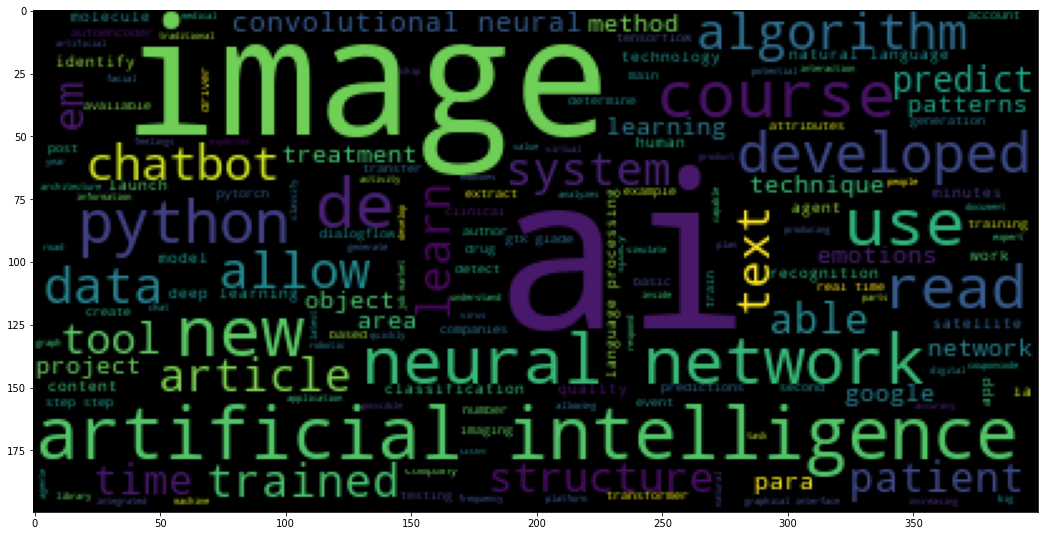

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize = (18,10))
plt.imshow(WordCloud().generate(texts_string));

### Search in posts

In [ ]:
string = 'launch practical training deep learning tensorflow python create step step projects modern machine learning'

In [ ]:
search_strings = ['deep', 'python']
tokens_list = [nlp(item) for item in search_strings]
tokens_list

[deep, python]

In [ ]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)
matcher.add('SEARCH', None, *tokens_list)

In [ ]:
doc = nlp(string)
matches = matcher(doc)
matches

[(8661325627334373315, 3, 4), (8661325627334373315, 6, 7)]

In [ ]:
doc[3:4], doc[6:7]

(deep, python)

In [ ]:
doc[3-2:4+2]

practical training deep learning tensorflow

In [ ]:
doc[6-2:7+2]

learning tensorflow python create step

In [ ]:
search_strings = ['deep learning', 'python']
tokens_list = [nlp(item) for item in search_strings]
matcher = PhraseMatcher(nlp.vocab)
matcher.add('SEARCH', None, *tokens_list)
number_of_words = 10

In [ ]:
search_strings_html = ' '.join([str(element) for element in search_strings])
search_strings_html

'deep learning python course'

In [ ]:
from IPython.core.display import HTML
import warnings
warnings.simplefilter('ignore')

In [ ]:
for index, row in dataframe_posts.iterrows():
  #print(index, row)
  marked_text = ''
  doc = nlp(row['translation'].lower())
  id = row['id']
  matches = matcher(doc)
  if matches == []:
    continue

  display(HTML(f'<h3>{search_strings_html.upper()}</h3>'))
  display(HTML(f"""
                <p>
                  <strong>ID:</strong>{id}</br>
                  <strong>Number of words found </strong>{len(matches)}
                </p>
               """))
  for i in matches:
    #print(i)
    start = i[1] - number_of_words
    if start < 0:
      start = 0
    for j in range(len(tokens_list)):
      if doc[i[1]:i[2]].similarity(tokens_list[j]) == 1.0:
        search_text = str(tokens_list[j])
        marked_text += str(doc[start:i[2] + number_of_words]).replace(search_text, f"<mark>{search_text}</mark>")
  display(HTML(f"""<blockquote>... {marked_text} ..."""))

### Aggregating posts by date

In [ ]:
dataframe_posts.head(1)

,message,created_time,id,permalink_url,likes,translation,translation pre
63,LANÇAMENTO! Formação Prática em Deep Learning e TensorFlow com Python! Crie passo a passo 16 pro...,2020-01-29T17:38:01+0000,228782997490446_1035374173497987,https://www.facebook.com/228782997490446/posts/1035374173497987/,81,LAUNCH! Practical Training in Deep Learning and TensorFlow with Python! Create step-by-step 16 p...,launch practical training deep learning tensorflow python create step step projects modern machi...


In [ ]:
dataframe_posts['created_time'] = pd.to_datetime(dataframe_posts['created_time'])

In [ ]:
posts_date = dataframe_posts.groupby(dataframe_posts['created_time'].dt.month).count() # average, sum
posts_date

,message,created_time,id,permalink_url,likes,translation,translation pre
created_time,,,,,,,
1,34,34,34,34,34,34,34
2,32,32,32,32,32,32,32
3,28,28,28,28,28,28,28


In [ ]:
plot = px.bar(posts_date, x = posts_date.index, y = 'message', title = 'Posts by month')
plot.show()

### Extracting comments from posts

In [ ]:
list_of_comments = []
for index, post in dataframe_posts.iterrows():
  #print(index, post)
  #print(post['id'])
  comments = graph.get_connections(id = post['id'], connection_name = 'comments', include_hidden = True)
  #print(comments)
  if comments['data']:
    #print(comments)
    list_of_comments.append(comments['data'][0]['message'])

In [ ]:
list_of_comments[0:4]

['Com as promoções, tenho quase todos rs, já esperando próximo paga 1 leve 3 🤑🤑',
 'Pra quem está em dúvida sobre o curso, já fiz um e estou pra começar outro. O Jones tem excelente didática. Lógico que o conteúdo não é simples, mas, começar bem faz toda a diferença na jornada',
 'Ola, Prof. Jones, tem como colocar um módulo desse assunto no seu novo curso de Deep Learning e TensorFlow com Python ? Eu também estou com esse curso e estou gostando muito ! 😀',
 'Bom dia Jones. Seria interessante incluir no curso como usar o pytorch xla e como configurar no collab. Precisei fazer isso e foi uma dor de cabeça hehe']

In [ ]:
len(list_of_comments)

42

In [ ]:
comments_df = pd.DataFrame(list_of_comments, columns = ['text'])
comments_df

,text
0,"Com as promoções, tenho quase todos rs, já esperando próximo paga 1 leve 3 🤑🤑"
1,"Pra quem está em dúvida sobre o curso, já fiz um e estou pra começar outro. O Jones tem excelent..."
2,"Ola, Prof. Jones, tem como colocar um módulo desse assunto no seu novo curso de Deep Learning e ..."
3,Bom dia Jones. Seria interessante incluir no curso como usar o pytorch xla e como configurar no ...
4,Mariana Kleina
5,Sidivaldo Oliveira
6,👏👏🎖️
7,Um fator importante hj em dia tem sido a disponibilidade de bolsas.. o cenário mudou bastante de...
8,Tentei me inscrever no site pra fazer o curso: inseri nome e e-mail e recebi e-mail de confirmaç...
9,eu sonhei com isso nessa madrugada


In [ ]:
comments_df['len'] = comments_df['text'].apply(len)
comments_df

,text,translation,len
0,"Com as promoções, tenho quase todos rs, já esperando próximo paga 1 leve 3 🤑🤑",None,77
1,"Pra quem está em dúvida sobre o curso, já fiz um e estou pra começar outro. O Jones tem excelent...",None,193
2,"Ola, Prof. Jones, tem como colocar um módulo desse assunto no seu novo curso de Deep Learning e ...",None,177
3,Bom dia Jones. Seria interessante incluir no curso como usar o pytorch xla e como configurar no ...,None,152
4,Mariana Kleina,None,14
5,Sidivaldo Oliveira,None,18
6,👏👏🎖️,None,4
7,Um fator importante hj em dia tem sido a disponibilidade de bolsas.. o cenário mudou bastante de...,None,265
8,Tentei me inscrever no site pra fazer o curso: inseri nome e e-mail e recebi e-mail de confirmaç...,None,227
9,eu sonhei com isso nessa madrugada,None,34


In [ ]:
comments_df = comments_df[comments_df['len'] > 30]
comments_df.shape

(25, 3)

In [ ]:
comments_df

,text,translation,len
0,"Com as promoções, tenho quase todos rs, já esperando próximo paga 1 leve 3 🤑🤑",None,77
1,"Pra quem está em dúvida sobre o curso, já fiz um e estou pra começar outro. O Jones tem excelent...",None,193
2,"Ola, Prof. Jones, tem como colocar um módulo desse assunto no seu novo curso de Deep Learning e ...",None,177
3,Bom dia Jones. Seria interessante incluir no curso como usar o pytorch xla e como configurar no ...,None,152
7,Um fator importante hj em dia tem sido a disponibilidade de bolsas.. o cenário mudou bastante de...,None,265
8,Tentei me inscrever no site pra fazer o curso: inseri nome e e-mail e recebi e-mail de confirmaç...,None,227
9,eu sonhei com isso nessa madrugada,None,34
10,Pois eh uma ferramenta muito poderosa,None,37
11,"Isto é extremamente massa, é oq quero fazer na minha área",None,57
12,nao eu prefiro a moda antigo !! osso com osso !!,None,48


### Pre-processing the comments

In [ ]:
comments_df['translation'] = None
for index, post in comments_df.iterrows():
  translated = GoogleTranslator(source = 'pt', target = 'en').translate(comments_df['text'][index])
  comments_df['translation'][index] = translated

In [ ]:
comments_df

,text,translation,len
0,"Com as promoções, tenho quase todos rs, já esperando próximo paga 1 leve 3 🤑🤑","With the promotions, I have almost all of them lol, already waiting for the next one pay 1 take ...",77
1,"Pra quem está em dúvida sobre o curso, já fiz um e estou pra começar outro. O Jones tem excelent...","For those who are in doubt about the course, I've already done one and I'm about to start anothe...",193
2,"Ola, Prof. Jones, tem como colocar um módulo desse assunto no seu novo curso de Deep Learning e ...","Hello, Prof. Jones, can you put a module on this subject in your new Deep Learning and TensorFlo...",177
3,Bom dia Jones. Seria interessante incluir no curso como usar o pytorch xla e como configurar no ...,Good morning Jones. It would be interesting to include in the course how to use pytorch xla and ...,152
7,Um fator importante hj em dia tem sido a disponibilidade de bolsas.. o cenário mudou bastante de...,An important factor nowadays has been the availability of scholarships.. the scenario has change...,265
8,Tentei me inscrever no site pra fazer o curso: inseri nome e e-mail e recebi e-mail de confirmaç...,I tried to register on the site to take the course: I entered my name and email and received a c...,227
9,eu sonhei com isso nessa madrugada,I dreamed about this this morning,34
10,Pois eh uma ferramenta muito poderosa,"Well, it's a very powerful tool.",37
11,"Isto é extremamente massa, é oq quero fazer na minha área","This is extremely cool, this is what I want to do in my area",57
12,nao eu prefiro a moda antigo !! osso com osso !!,"No, I prefer the old fashioned way!! bone on bone!!",48


In [ ]:
comments_df['translation pre'] = comments_df['translation'].apply(preprocessing)
comments_df

,text,translation,len,translation pre
0,"Com as promoções, tenho quase todos rs, já esperando próximo paga 1 leve 3 🤑🤑","With the promotions, I have almost all of them lol, already waiting for the next one pay 1 take ...",77,promotions lol waiting pay 🤑 🤑
1,"Pra quem está em dúvida sobre o curso, já fiz um e estou pra começar outro. O Jones tem excelent...","For those who are in doubt about the course, I've already done one and I'm about to start anothe...",193,doubt course start jones excellent teaching skills course content simple starting makes differen...
2,"Ola, Prof. Jones, tem como colocar um módulo desse assunto no seu novo curso de Deep Learning e ...","Hello, Prof. Jones, can you put a module on this subject in your new Deep Learning and TensorFlo...",177,hello prof jones module subject new deep learning tensorflow python course course enjoying 😀
3,Bom dia Jones. Seria interessante incluir no curso como usar o pytorch xla e como configurar no ...,Good morning Jones. It would be interesting to include in the course how to use pytorch xla and ...,152,good morning jones interesting include course use pytorch xla configure collab headache hehe
7,Um fator importante hj em dia tem sido a disponibilidade de bolsas.. o cenário mudou bastante de...,An important factor nowadays has been the availability of scholarships.. the scenario has change...,265,important factor nowadays availability scholarships .. scenario changed lot year .. academic mon...
8,Tentei me inscrever no site pra fazer o curso: inseri nome e e-mail e recebi e-mail de confirmaç...,I tried to register on the site to take the course: I entered my name and email and received a c...,227,tried register site course entered email received confirmation email directs page says successfu...
9,eu sonhei com isso nessa madrugada,I dreamed about this this morning,34,dreamed morning
10,Pois eh uma ferramenta muito poderosa,"Well, it's a very powerful tool.",37,powerful tool
11,"Isto é extremamente massa, é oq quero fazer na minha área","This is extremely cool, this is what I want to do in my area",57,extremely cool want area
12,nao eu prefiro a moda antigo !! osso com osso !!,"No, I prefer the old fashioned way!! bone on bone!!",48,prefer old fashioned way bone bone


### Sentiment analysis

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
classifier = SentimentIntensityAnalyzer()
classifier.polarity_scores('I love this food')

{'compound': 0.6369, 'neg': 0.0, 'neu': 0.323, 'pos': 0.677}

In [ ]:
classifier.polarity_scores('I hate this food')

{'compound': -0.5719, 'neg': 0.649, 'neu': 0.351, 'pos': 0.0}

In [ ]:
classifier.polarity_scores('I have this food')

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [ ]:
comments_df = comments_df.reset_index(drop = True)

In [ ]:
comments_df['Sentiment'] = None
for i in range(0, len(comments_df)):
  sentiment = classifier.polarity_scores(comments_df['translation pre'][i])
  #print(sentiment)
  if sentiment['pos'] > sentiment['neg'] and sentiment['pos'] > sentiment['neu']:
    comments_df['Sentiment'][i] = 'Positive'
  elif sentiment['neg'] > sentiment['pos'] and sentiment['neg'] > sentiment['neu']:
    comments_df['Sentiment'][i] = 'Negative'
  elif sentiment['neu'] > sentiment['pos'] and sentiment['neu'] > sentiment['neg']:
    comments_df['Sentiment'][i] = 'Neutral'
  else:
    comments_df['Sentiment'][i] = 'No classification'

In [ ]:
comments_df

,text,translation,len,translation pre,Sentiment
0,"Com as promoções, tenho quase todos rs, já esperando próximo paga 1 leve 3 🤑🤑","With the promotions, I have almost all of them lol, already waiting for the next one pay 1 take ...",77,promotions lol waiting pay 🤑 🤑,Positive
1,"Pra quem está em dúvida sobre o curso, já fiz um e estou pra começar outro. O Jones tem excelent...","For those who are in doubt about the course, I've already done one and I'm about to start anothe...",193,doubt course start jones excellent teaching skills course content simple starting makes differen...,Neutral
2,"Ola, Prof. Jones, tem como colocar um módulo desse assunto no seu novo curso de Deep Learning e ...","Hello, Prof. Jones, can you put a module on this subject in your new Deep Learning and TensorFlo...",177,hello prof jones module subject new deep learning tensorflow python course course enjoying 😀,Neutral
3,Bom dia Jones. Seria interessante incluir no curso como usar o pytorch xla e como configurar no ...,Good morning Jones. It would be interesting to include in the course how to use pytorch xla and ...,152,good morning jones interesting include course use pytorch xla configure collab headache hehe,Neutral
4,Um fator importante hj em dia tem sido a disponibilidade de bolsas.. o cenário mudou bastante de...,An important factor nowadays has been the availability of scholarships.. the scenario has change...,265,important factor nowadays availability scholarships .. scenario changed lot year .. academic mon...,Neutral
5,Tentei me inscrever no site pra fazer o curso: inseri nome e e-mail e recebi e-mail de confirmaç...,I tried to register on the site to take the course: I entered my name and email and received a c...,227,tried register site course entered email received confirmation email directs page says successfu...,Neutral
6,eu sonhei com isso nessa madrugada,I dreamed about this this morning,34,dreamed morning,Neutral
7,Pois eh uma ferramenta muito poderosa,"Well, it's a very powerful tool.",37,powerful tool,Positive
8,"Isto é extremamente massa, é oq quero fazer na minha área","This is extremely cool, this is what I want to do in my area",57,extremely cool want area,Positive
9,nao eu prefiro a moda antigo !! osso com osso !!,"No, I prefer the old fashioned way!! bone on bone!!",48,prefer old fashioned way bone bone,Neutral


In [ ]:
comments_df.to_csv('comments.csv')

In [ ]:
plot = px.histogram(x = comments_df['Sentiment'])
plot.show()